# **Data Exploration**



<h1>Table of Contents<span class="tocSkip"></span></h1>

___


- **1. Overview**
    - 1.1 Purpose
    - 1.2 Titanic Dataset Description
- **2. Data Pre-Processing** 
    - 2.1 Import Libraries and Data
    - 2.2 Titanic Data Examination
        - Dataset Information
        - Duplicate Values
        - Missing Values
- **3. Data Visualisation and Preparation**
    - 3.1 Data Visualisation to Understand the Titanic dataset
    - 3.2  Variable Transformation and Feature Engineering
    - 3.3 Data Check
- **4. Data Modelling**
    - 4.1 Feature Selection
    - 4.2 Modelling Stage
    
    
### **Markdown Guide**:
  [Medium](https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd)



# Overview

## Purpose

The aim of this project is to explore and analyse the Titanic dataset and build a classification model to predict whether a person will perish or survive if they were to get on the Titanic.

## Dataset Description

The dataset used here can be found on [Kaggle](www.kaggle.com/c/titanic-gettingStarted/data). It has been used and it still being used by a lot of people for introducton to Machine Learning.The data consists of 12 attributes, of which 1 is the target variable "Survived". Survived has 2 categories, 0 for a person who perished and 1 for a person who survived.

**Attributes Explained**

| Attribute | Description | Type | 
| --- | --- | --- |
| PassangerId | A random number used to identify each row | Numerical |
| Survived | Target variable. 0(Perished) & 1(Not perish) | Categorical(Nominal/Binomial) |
| Pclass | Passanger Class status. 1(1st), 2(2nd) & 3(3rd) | Categorical(Ordinal) |
| Name | Name of Passanger | String |
| Sex | Sex(Female and Male) | Categorical(Nominal) |
| Age | Ages of passagers | Numerical |
| SibSp | Number of Siblings/Spouses aboard | Numerical |
|Parch | Number of parents/children aboard | Numerical |
| Ticket | Ticket Number of passangers | String |
| Fare | Fare paid by passanger | Numerical |
| Cabin | Cabin | String |
| Embarked | Port of embarkment | Categorical |



# Data Pre-processing


## Import data and libraries
***

In [1]:
# For modelling, feature selection and preprocessing
import sklearn


# For modelling data
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier


import pandas as pd # For creating and manipulating data frames
import numpy as np  # For performing algebra operations on data

# For visualising data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from matplotlib import pyplot


import random # For generating random nubers

from scipy import stats #For getting statistical description of data

from sklearn.preprocessing import RobustScaler # For scaling input data

#For encoding data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder

# For selecting best features for data modelling
from sklearn.feature_selection import RFE


# For fitting a normal distribution
from scipy.stats import norm

# For getting accuracy metrices from model
from sklearn.metrics import classification_report,confusion_matrix


In [2]:
import itertools

In [3]:
print(sklearn.__version__) #checking the version of sklearn

0.22.2.post1


In [4]:
train=pd.read_csv('C:/Users/Student/Desktop/GitProjects/titanic_train.csv')
test=pd.read_csv('C:/Users/Student/Desktop/GitProjects/titanic_test.csv')

In [5]:
train.index

RangeIndex(start=0, stop=891, step=1)

In [6]:
test['Survived']="Nan"

### Combine the data by rows

* I decided to combine the data by rows.
* The reason for that is that the whole data needs to be explored,cleaned and transformed. If I explore only the train data then the data will be inconsistent as there will be data that is in train set and not in test set.
* For example, I have decided to engineer a new column called "Age_Cat". If I were to do that only to train set then the test dataset would not have this column. Also if i were to only look at missing values on the train set then the test set missing values would not be taken care of.
* So it is important to combine the data so that whetever you do on the train set you also do automatically to the test set.
* But test set has not target variable, so you will first have to create the target variablecolumn on test set with empty values then combine,
* Because test set has no target variable values, I have decided to use only the training dataset values for visuals as almost all my visuals involve the target variable. I did this by indexing the combined data as I know where the test set begins and ends in the combined data.
* Other operations I did on the whole dataset.
* I will te split the data intotrain and test set when I am about to model the data.

In [7]:
#Combine the data
data=pd.concat([train,test])

In [8]:
print(data.index)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            408, 409, 410, 411, 412, 413, 414, 415, 416, 417],
           dtype='int64', length=1309)


In [9]:
# Fix the index of the data
data.index=range(0,len(data))

In [10]:
print(data.index)

RangeIndex(start=0, stop=1309, step=1)


## Titanic data Examination
***

### Dataset information

In [11]:
#Get number of rows for test and train data
t=data.shape
#te=test.shape
print('Train has ',t[0],' observations')
#print('Test has ',te[0],' observations')

Train has  1309  observations


In [12]:
#Combine the train and test data 
#train=pd.concat([train,test])
#train.shape

In [13]:
#Get column names of data
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
#Look at the first column rows of the data

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,Nan,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,Nan,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,Nan,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,Nan,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,Nan,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [16]:
#Get the data types of the columns 
data.dtypes

PassengerId      int64
Survived        object
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##### We have 5 categorical variables and 7 numeric variables

In [17]:
#Change Pclass,Survived to strings
for i in range(len(data)):
    s=np.float64(data["Pclass"][i])   
    data.Pclass[i]=np.str(s)
data.Pclass[0]

 

C:\Users\Student\Anaconda2\envs\Real_Useful_Python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Student\Anaconda2\envs\Real_Useful_Python\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


'3.0'

In [18]:
# Change Survived to string
for i in range(len(data)):
    s=np.float64(data["Survived"][i])   
    data.Survived[i]=np.str(s)
data.Survived[0]

C:\Users\Student\Anaconda2\envs\Real_Useful_Python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


'0.0'

### Duplicate values

In [19]:
dup_data=data[data.duplicated()]
dup_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


##### There are no duplicate values

### Missing values treatment

In [20]:
# Check for missing values
for i in data.columns:
    print(i," has ",data[i].isna().sum()," NaN values")

PassengerId  has  0  NaN values
Survived  has  0  NaN values
Pclass  has  0  NaN values
Name  has  0  NaN values
Sex  has  0  NaN values
Age  has  263  NaN values
SibSp  has  0  NaN values
Parch  has  0  NaN values
Ticket  has  0  NaN values
Fare  has  1  NaN values
Cabin  has  1014  NaN values
Embarked  has  2  NaN values


In [21]:
# Check if there are any None values
s=0
for i in data.columns:
    for n in range(len(data)):
        if data[i][n]==None:
            s+=1
    print(i," has ",s," None values")

PassengerId  has  0  None values
Survived  has  0  None values
Pclass  has  0  None values
Name  has  0  None values
Sex  has  0  None values
Age  has  0  None values
SibSp  has  0  None values
Parch  has  0  None values
Ticket  has  0  None values
Fare  has  0  None values
Cabin  has  0  None values
Embarked  has  0  None values


In [22]:
# Check if there are any empty values
s=0
for i in data.columns:
    for n in range(len(data)):
        if data[i][n]=="":
            s+=1
    print(i," has ",s," empty values")

PassengerId  has  0  empty values
Survived  has  0  empty values
Pclass  has  0  empty values
Name  has  0  empty values
Sex  has  0  empty values
Age  has  0  empty values
SibSp  has  0  empty values
Parch  has  0  empty values
Ticket  has  0  empty values
Fare  has  0  empty values
Cabin  has  0  empty values
Embarked  has  0  empty values


##### So the columns that have missing values are Age,Cabin and Embarked columns.

In [23]:
# Percentage of missing values

a=data["Age"].isna().sum()
print("Age has ",(a/len(data))*100,"% missing values")

c=data["Cabin"].isna().sum()
print("Cabin has ",(c/len(data))*100,"% missing values")

e=data["Embarked"].isna().sum()
print("Emarked has ",(e/len(data))*100,"% missing values")


Age has  20.091673032849503 % missing values
Cabin has  77.46371275783041 % missing values
Emarked has  0.15278838808250572 % missing values


In [24]:
#Since the data is not large, we will impute these values as the deletion of rows will reduce the dataset size.
#I will use General imputation. The age missing values will be replaced by the mean of non-missing values of age, while those of Cabin and Embarked will be replaced by the mode of non-missing values of Cabin and Embarked respectively.

#m=0
#for i in range(len(train)):
    #s=str(train["Age"][i])
    #if s[0]!='n':
        #m+=train["Age"][i]
         
    #else:
        #continue
        
        
mean=data.Age.mean()    
#mean_age=m/len(train)
print("Mean of Age is: ",mean)

Mean of Age is:  29.881137667304014


In [25]:
# Replace missing values of Age with the mean 
#for i in range(len(train)):
    #s=str(train["Age"][i])
    #if s[0]=='n':
        #train["Age"][i]=mean_age

# Check if the missing values have really been replaced

data["Age"].fillna(int(mean),inplace=True)
a=data["Age"].isna().sum()
print("Age has ",(a/len(data))*100,"% missing values")

Age has  0.0 % missing values


In [26]:
# delete the columns Cabin as is has many missing values using

del data['Cabin']

In [27]:
#check if Cabin has been deleted
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [28]:
# Impute the values for Embarked column using mode
print(data['Embarked'].value_counts())

S    914
C    270
Q    123
Name: Embarked, dtype: int64


In [29]:
# Mode is S
data['Embarked'].fillna(str('S'),inplace=True)

In [30]:
data['Embarked'].isna().sum()

0

In [31]:
# Impute Fare using mean
data["Fare"].fillna(int(mean),inplace=True)
a=data["Fare"].isna().sum()
print("Fare has ",(a/len(data))*100,"% missing values")

Fare has  0.0 % missing values


In [32]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [33]:
data.index

RangeIndex(start=0, stop=1309, step=1)

In [34]:
len(data.columns)

11

In [35]:
#Split the test and train data again after cleaning

train=data.iloc[:891,:]
test=data.iloc[891:,:]

In [36]:
len(train)

891

In [37]:
len(test)

418

In [38]:
#Delete the target column we created before concatenating the data

del test['Survived']

In [39]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

## Data Visualisation to Understand the Data
***

### How are numerical features distributed?


> The charts below (histograms+rug plot) answer the question `How are numerical features distributed?`

The histogram gives an indication of how the numerical variables are distributed in terms of shape.It also how frequently a certain range of data points occur in the data. The range of points that occur the most are seen with peaks. The rug plot(which are the small lue lines at the bottom) shows specifically how frequently a data point occurs in a certain range. The data points that occur the most in a certain range are indicated by the thickened rug plot lines.

In [40]:
data.dtypes

PassengerId      int64
Survived        object
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

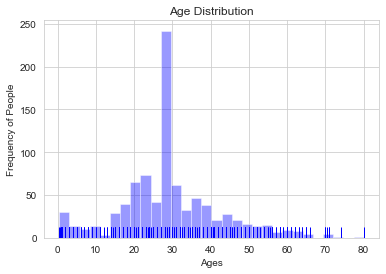

In [41]:
sns.distplot(data.iloc[:891,:].Age,kde=False,color='blue',rug=True)
plt.title("Age Distribution")
plt.xlabel("Ages")
plt.ylabel("Frequency of People")
plt.show()

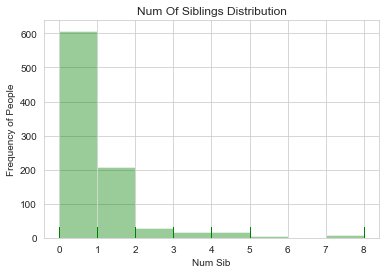

In [42]:
sns.distplot(data.iloc[:891,:].SibSp,kde=False,color='green',rug=True,bins=8)
plt.title("Num Of Siblings Distribution")
plt.xlabel("Num Sib")
plt.ylabel("Frequency of People")
plt.show()

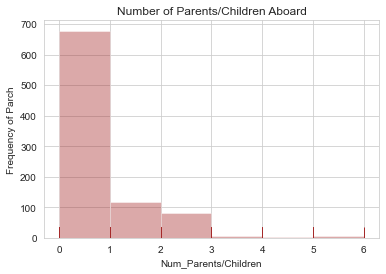

In [43]:
sns.distplot(data.iloc[:891,:].Parch,kde=False,color='brown',rug=True,bins=6)
plt.title("Number of Parents/Children Aboard")
plt.xlabel("Num_Parents/Children")
plt.ylabel("Frequency of Parch")
plt.show()

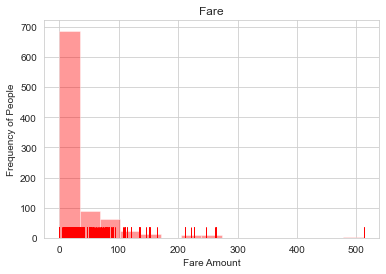

In [44]:
sns.distplot(data.iloc[:891,:].Fare,kde=False,color='red',rug=True,bins=15)
plt.title('Fare')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency of People')
plt.show()

### How do Categorical Features Vary In Numbers?


> The below bar charts answer teh question `How do Categorical Features Vary In Numbers?`

The bar plots below give a count/distribution of the classes in the categorical variables.

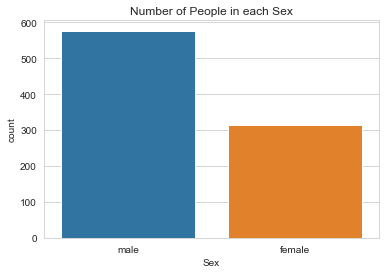

In [45]:
sns.countplot(data.iloc[:891,:].Sex)
plt.title("Number of People in each Sex")
plt.show()

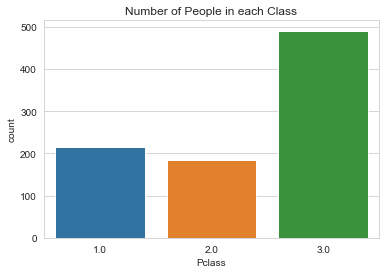

In [46]:
sns.countplot(data.iloc[:891,:].Pclass)
plt.title("Number of People in each Class")
plt.show()

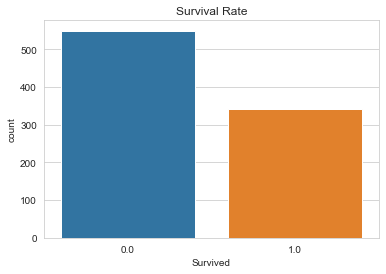

In [47]:
sns.countplot(data.iloc[:891,:].Survived)
plt.title("Survival Rate")
plt.show()

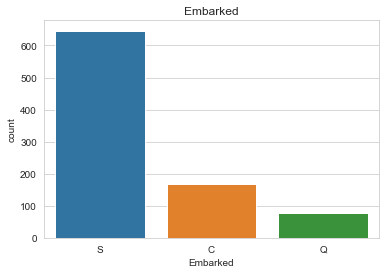

In [48]:
sns.countplot(data.iloc[:891,:].Embarked)
plt.title("Embarked")
plt.show()

### Questions Derived From Plots Above and To Be Explored Next :

#### 1. **Fare**
- How is the Fare distributed according to survival? 
    - Survived vs Fare plot
- What is the distribution of fare according to class?
  - Fare vs Pclass
* What is the distribution of fare according to survival and class? 
  - Fare vs Pclass vs Survived

#### 2. **Num of Siblings**
-  How is number of siblings distributed according to survival?
- How is number of siblings distributed according to Pclass?
- How is the number of siblings distributed according to Pclass, and sex?
- How is the number of siblings distributed according to Pclass and Survived?

#### 3. Pclass
* what is the survival rate of people with respect to classes?
  - Survived vs Pclas
  
#### 4. Age
* How is age distributed according to the target variable?
  - Survied vs Age
* How is age distrbuted according to target variable and sex?
  - Age vs Surived vs Sex



### How is Fare distributed according to the target feature?

> The below charts answer the question : `What is the survival rate based on Fare?`

The violn and swarm plots below provide a distribution of the Fare according to the survival target variable. The peaks of the violin plot show where most of the numerical features occur. It will help reveal the highest fare of people who survived and did not survive. The mean and median shown aids in revealing the skweness of the numerical features according to the target variable. The mean and median indicate the following according to how they appear :

* 1. `If mean > median then the distribution is positively skewed`. This means most of the data points occur on the left tail of the distribution(Most data points are on the bottom side of the plot).
* 2. `If mean < median then the distribution is negatively skewed`. This means most of the data points occur on the right tail of the distribution(Most data points occur on the top side of the plot).
* 3. `If mean=median then the distribution is symmmetric `.This mean that the data points are equally distributedon both sides(Data points are concentrated on both sides).


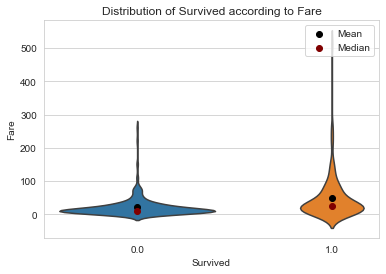

In [49]:
sns.violinplot(x='Survived',y='Fare',data=data.iloc[:891,:],inner=None,pallete='rainbow');

fare_mean = train.groupby('Survived')['Fare'].mean() 
fare_median = train.groupby('Survived')['Fare'].median() 

plt.scatter(x=range(len(fare_mean)),y=fare_mean,c="k", label = "Mean");
plt.scatter(x=range(len(fare_median)),y=fare_median, c="maroon", label = "Median");
plt.legend();
plt.title("Distribution of Survived according to Fare")
plt.show()

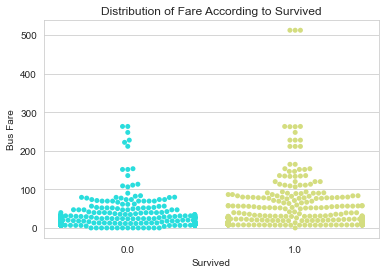

In [50]:
sns.swarmplot(x='Survived',y='Fare',data=data.iloc[:891,:],palette='rainbow')
plt.ylabel("Bus Fare")
plt.title("Distribution of Fare According to Survived")
plt.show()

> **Observation 1**: For the perished group we see that most of the fare paid ranged between 0 and 100. That also applies to the group of people who survived. 

> **Observation 2**: For the group of people who perished less of the dare fare paid raned from 100 to 300, that also applies to the group of people who survived. 

> **Observation 3**: The distribution of fare in perished and survived group is almost the same. So we can say that there is nothing that seperates the two groups according to fare. And so we can conclude that there is no pattern that shows that fare is predictive.

I am not going to further explore the variable Fare because as it seems it has no predictive power. It seesm that you can have a low orhigh fare and still perish or survive. There is nopredictive power in Fare.

### What is the distribution of fare according to class?

> The below swarm plot answers the question `How is fare distributed according to class?`

The swarm plot below shows the distribution of the fare according to class. It also shows the outliers if there are any.

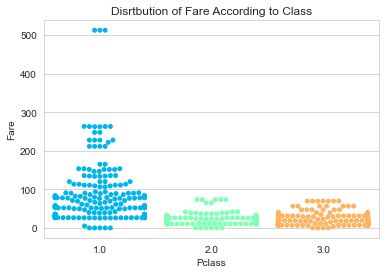

In [51]:
sns.swarmplot(x='Pclass',y='Fare',data=data.iloc[:891,:],palette='rainbow')
plt.title("Disrtbution of Fare According to Class")
plt.show()

> **Observation 1**: First class has the highest Fare compared to the other classes. The second and thord classes have the same distribution for Fare. 


The fact that from the 1st class the fare is the same as 2nd and 3rd class is very confusing.One would expect the fare of 1st class to start at higher values than that of 2nd and 3rd class.Same as 2nd class, the fare should be higher than that of 3rd class.

### What is the distribution of fare according to Survial and class? 

> The below plot answers the question `What is the distribution of fare according to survival and class?`

The below violin plot demonstrates the distribution of fare according to class and survival. It shows the fare of passangers according to class and survival. It specifically shows the distribution of fare according to each class and within each class it shows the distribution of fare according to the two categories of the survived variable.

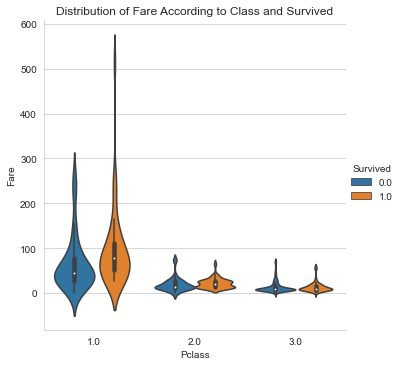

In [52]:
sns.catplot(x='Pclass',y='Fare',hue='Survived',kind='violin',ci=None,data=data.iloc[:891,:])
plt.title("Distribution of Fare According to Class and Survived")
plt.show()


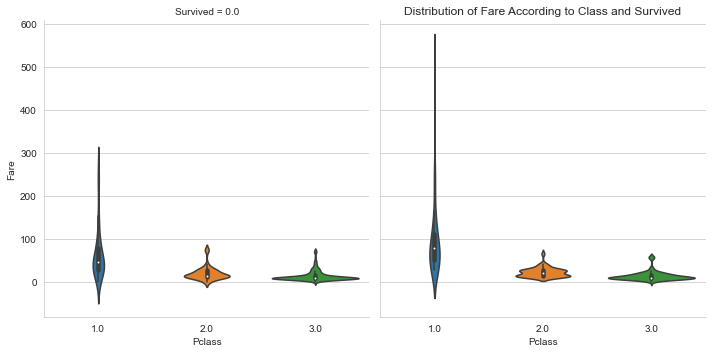

In [53]:
sns.catplot(x='Pclass',y='Fare',col='Survived',kind='violin',ci=None,data=data.iloc[:891,:])
plt.title("Distribution of Fare According to Class and Survived")
plt.show()


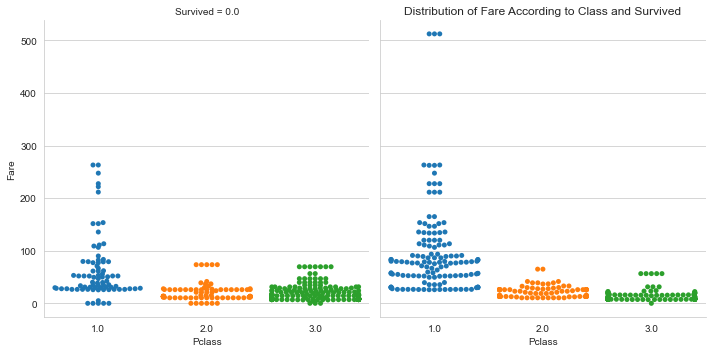

In [54]:
sns.catplot(x='Pclass',y='Fare',col='Survived',kind='swarm',ci=None,data=data.iloc[:891,:])
plt.title("Distribution of Fare According to Class and Survived")
plt.show()


> **Observation 1**: The first class has the highest fare for both survived and perished group.

> **Observation 2**: For first class the survived group of people have the highest fare compared to those who perished.

> **Observation 3**: All classes have the same distribution of fare, they all have positively skewed fare for both perished and survived group. And most of the data points are appearing between 0 and 100 for all classes and perished and survived people.


 ### How is the number of siblings distributed according to survived?

> The following plot(s) answers the question `How is number of siblings distributed according to survived? `

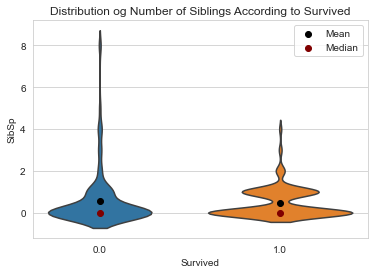

In [55]:
#sns.violinplot(x='Survived',y='SibSp',data=train,pallete=True)
sns.violinplot(x='Survived',y='SibSp',data=data.iloc[:891,:],inner=None,pallete=True);

sibsp_mean = data.iloc[:891,:].groupby('Survived')['SibSp'].mean() 
sibsp_median = data.iloc[:891,:].groupby('Survived')['SibSp'].median() 

plt.scatter(x=range(len(sibsp_mean)),y=sibsp_mean,c="k", label = "Mean");
plt.scatter(x=range(len(sibsp_median)),y=sibsp_median, c="maroon", label = "Median");
plt.title("Distribution og Number of Siblings According to Survived")
plt.legend();
plt.show()

The plots show that the group of people that did not survive have the maximum number of siblings/spouse. It also shows that both the perished group and survived group has a positively skewed distribution and that both groups mostly have number of siblings/spouse strating from 0 to 2. 

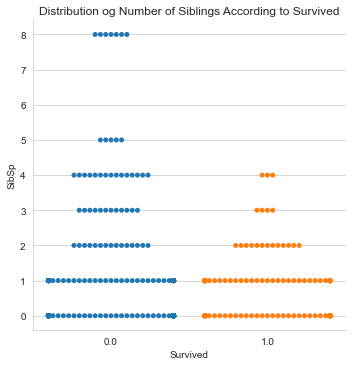

In [56]:
sns.catplot(x='Survived',y='SibSp',kind='swarm',data=data.iloc[:891,:]);
plt.title("Distribution og Number of Siblings According to Survived")
plt.show()

### How is the number of sibling distributed according to Pclass?

> The below plot answers the question `How is the number of siblings distributed according to Pclass?`

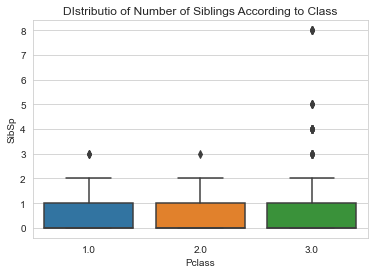

In [57]:
sns.boxplot(x="Pclass",y="SibSp",data=data.iloc[:891,:])
plt.title("DIstributio of Number of Siblings According to Class")
plt.show()

The classes have the same distribution for SibSp.But 3rd class has the highest number of siblings.

### How is the SibSp distributed according to Sex and Pclass?

> The below plots answer the question `How is SibSp distributed according to Sex and Pclass?`

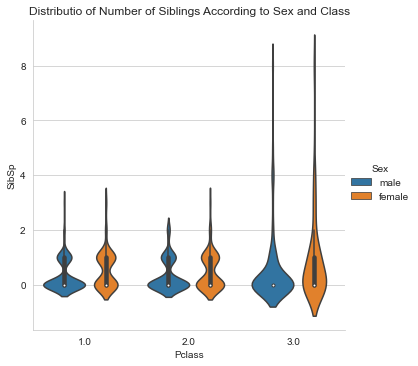

In [58]:
sns.catplot(x="Pclass",y="SibSp",hue="Sex",data=data.iloc[:891,:],kind="violin")
plt.title("Distributio of Number of Siblings According to Sex and Class")
plt.show()

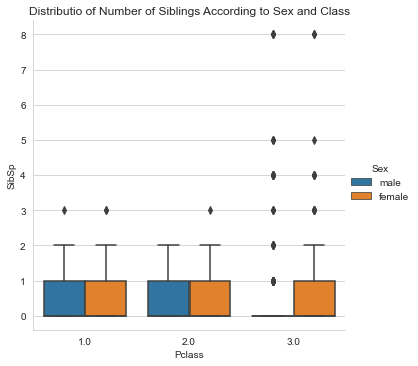

In [59]:
sns.catplot(x="Pclass",y="SibSp",hue="Sex",data=data.iloc[:891,:],kind="box")
plt.title("Distributio of Number of Siblings According to Sex and Class")
plt.show()

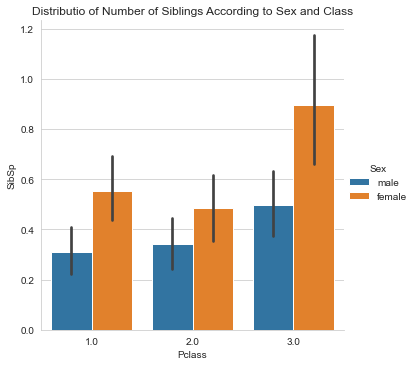

In [60]:
sns.catplot(x="Pclass",y="SibSp",hue="Sex",data=data.iloc[:891,:],kind="bar")
plt.title("Distributio of Number of Siblings According to Sex and Class")
plt.show()

### How is the number of siblings distributed according to Pclass and Survived?

> The below plots answer the quesrion `How is the SibSp distributed according to Pclass and Survived?`

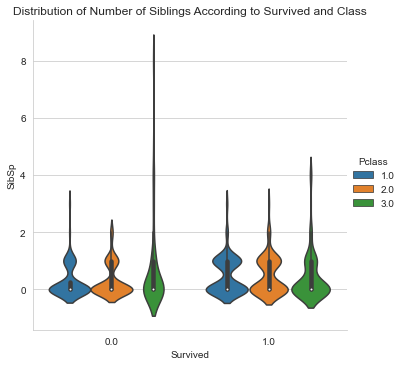

In [61]:
sns.catplot(x="Survived",y="SibSp",hue="Pclass",data=data.iloc[:891,:],kind="violin")
plt.title("Distribution of Number of Siblings According to Survived and Class")
plt.show()

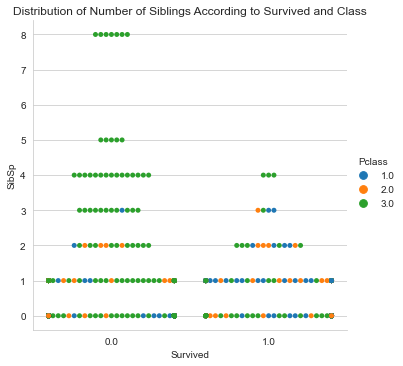

In [62]:
sns.catplot(x="Survived",y="SibSp",hue="Pclass",data=data.iloc[:891,:],kind="swarm")
plt.title("Distribution of Number of Siblings According to Survived and Class")
plt.show()

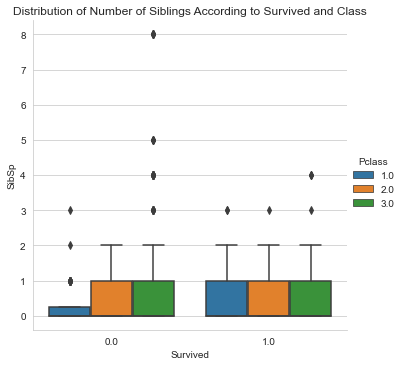

In [63]:
sns.catplot(x="Survived",y="SibSp",hue="Pclass",data=data.iloc[:891,:],kind="box")
plt.title("Distribution of Number of Siblings According to Survived and Class")
plt.show()

### How is SibSp sostributed according to Sex,Pclass and Survived?

> The below plots answer the question `How is SibSp distributed according to Sex,Pclass and Survived?`

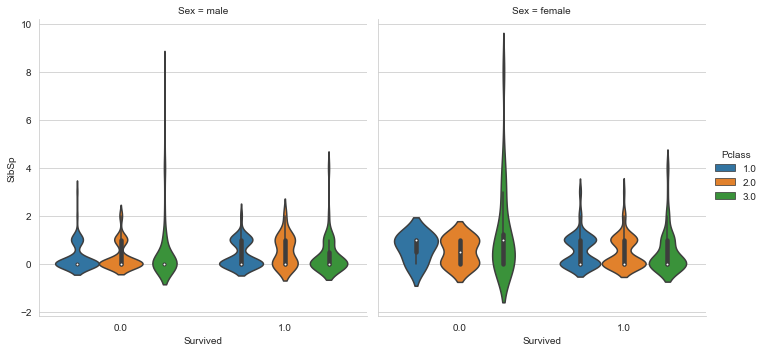

In [64]:
sns.catplot(x="Survived",y="SibSp",hue="Pclass",col="Sex",kind="violin",data=data.iloc[:891,:])
plt.show()

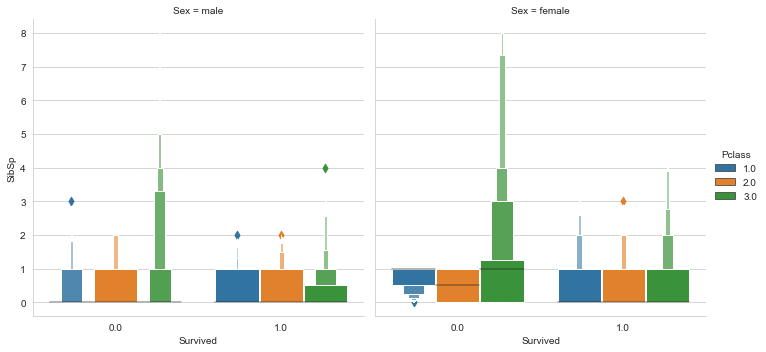

In [65]:
sns.catplot(x="Survived",y="SibSp",hue="Pclass",col="Sex",kind="boxen",data=data.iloc[:891,:])
plt.show()

> - **Observation 1** For both males and females and for both survived(1) and perished groups the third class has the highest number ofsiblings.
> - **Observation 2** 
>- ***For females***:
    - For the group of people that did not survive :
       - All the classes have a positively skewed distribution
       - All the classes mostly have number of siblings ranging from 0 to 2
    - For the group of people that did survive : 
      - All the classes mostly have number of siblings ranging from 0 to 2.
      - The first class has a positively skewed distribution, the second class has an almost symmetric distribution/ we can say it is positively skwewed. The third class is also positivelt skwewed.
>- ***For males***
>   - For both the survived and perished groups the third class had the highest number of siblings.
>   - For the perished group:
>     - The first class has a negatively skewed distribution.
>     - The second class has a symmetric distribution.
>     - The third class has a positively skewed distribution.
>   - For the group that survived :
      - All the classes have a positively skewed distribution
> ** - Females and males comparison:
>      -For both males and females for both survived(1) and perished groups(0) the third class has the highest number ofsiblings.
       - Almost all the classes of both females and males have number of siblings ranging from 0 to 2 thathave a positively skewed distribution, except for the second and first class of perished group of females.
       - The first and classes of perished females has SibSp ranging from 0 to 1.
       - The first class has a negatively skewed distribution and the second class has a symmetric distribution.


    

### How is Parch distrributed according to Pclass?

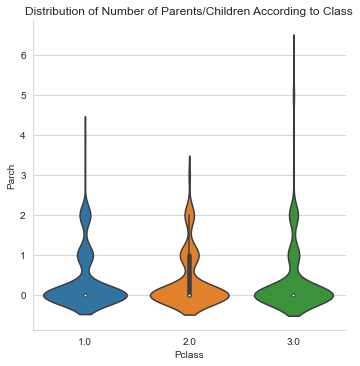

In [66]:
sns.catplot(x="Pclass",y="Parch",data=data.iloc[:891,:],kind="violin")
plt.title("Distribution of Number of Parents/Children According to Class")
plt.show()

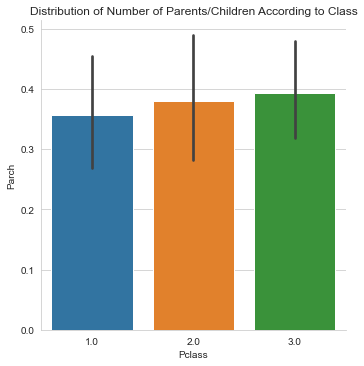

In [67]:
sns.catplot(x="Pclass",y="Parch",data=data.iloc[:891,:],kind="bar")
plt.title("Distribution of Number of Parents/Children According to Class")
plt.show()

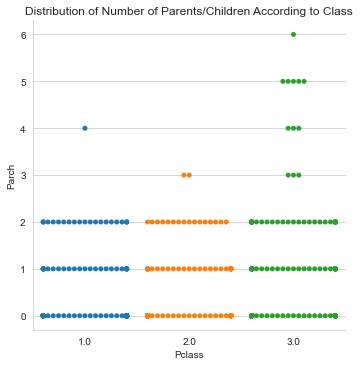

In [68]:
sns.catplot(x="Pclass",y="Parch",data=data.iloc[:891,:],kind="swarm")
plt.title("Distribution of Number of Parents/Children According to Class")
plt.show()

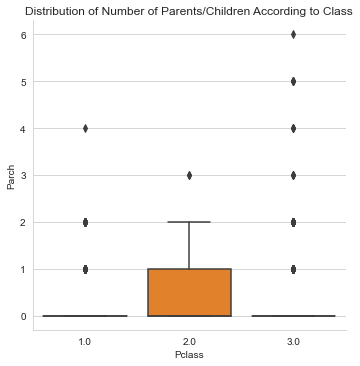

In [69]:
sns.catplot(x="Pclass",y="Parch",data=data.iloc[:891,:],kind="box")
plt.title("Distribution of Number of Parents/Children According to Class")
plt.show()

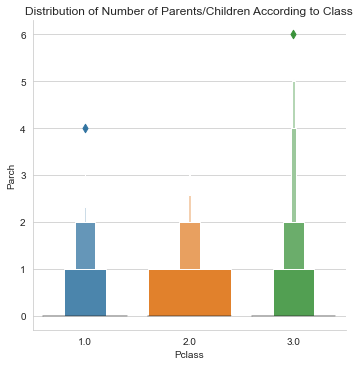

In [70]:
sns.catplot(x="Pclass",y="Parch",data=data.iloc[:891,:],kind="boxen")
plt.title("Distribution of Number of Parents/Children According to Class")
plt.show()

In [71]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,nan,3.0,"Spector, Mr. Woolf",male,29.0,0,0,A.5. 3236,8.0500,S
1305,1306,nan,1.0,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,nan,3.0,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,nan,3.0,"Ware, Mr. Frederick",male,29.0,0,0,359309,8.0500,S


### How is Age distributed According to the Target variable?

In [ ]:
sns.catplot(x='Survived',y='Age',kind='violin',inner=None,data=data.iloc[:891,:])


sibsp_mean = data.iloc[:891,:].groupby('Survived')['Age'].mean() 
sibsp_median = data.iloc[:891,:].groupby('Survived')['Age'].median() 

plt.scatter(x=range(len(sibsp_mean)),y=sibsp_mean,c="k", label = "Mean");
plt.scatter(x=range(len(sibsp_median)),y=sibsp_median, c="maroon", label = "Median");
plt.legend();
plt.title("Distributio of Age According to Survived ")
plt.show()

*Observation* The group of people that did not survive is positively skewed, meaning there were more people aged between 0 and 30. For the group of people that survived, there is symmetric distribution, meaning there were equla amounts of elders and children.
We can say if there is more children and young adults, the chances of survival are slim.

## Variable Transformation and Feature Engineering
---

### Variable Transformation on Age column

* There are many unique values for the Age variable, which means that when exploring the varible we might face some problems. 
* So, to make the Age column more manageable we will do a type of Variable Transformation called Binning.
* Variable transformation is the replacement of a variable by another value of different/same data type or by a function.
* Binning is used to categorize numerical variables. 
* The Age column will be changed to  a categorical variable. So, this means that the original values  will be assigned to a bin which they will fit according to their size. 
* And so the original values will be superseded by values that represent the interval of the original values.
* The ages will be categorized the followig way:
  * 1. (0-2]: Infant
  * 2. (2-5] : Toddler
  * 3. (5-12] : Child
  * 4. (12-18] : Teenager
  * 5. 918-25] : Young adult
  * 6. (25-40] : Adult
  * 7. (40-80] : Elder
  
Source: [Medium](https://towardsdatascience.com/feature-engineering-deep-dive-into-encoding-and-binning-techniques-5618d55a6b38) and [Practical Business Python](https://pbpython.com/pandas-qcut-cut.html)


In [73]:
len(data['Age'].unique())

98

In [74]:
data['Age'].dtype

dtype('float64')

In [75]:
print("Ages range from ",data['Age'].min()," to ",data['Age'].max())

Ages range from  0.17  to  80.0


In [76]:
bins=[0,2,5,12,18,25,40,80]
labels=['infant','toddl','child','teen','yong_adult','adult','elder']

In [77]:
data['Age_Cat']=pd.cut(data['Age'],bins,labels=labels)
# If you do not put labels=, and you just put labels, it will not apply the labels, it will only apply the bins.

In [78]:
data.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Cat
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,yong_adult
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult
5,6,0.0,3.0,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,Q,adult
6,7,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,elder
7,8,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,infant
8,9,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,adult
9,10,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,teen


### How is age distributed according to the target variable?

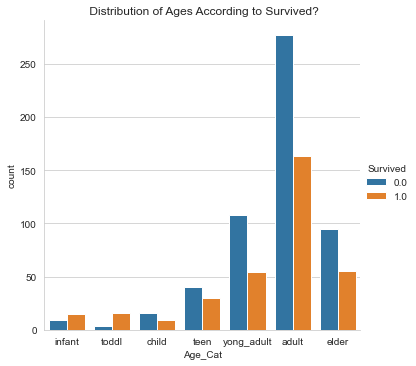

In [79]:
sns.catplot(x='Age_Cat',hue='Survived',kind='count',data=data.iloc[:891,:])
plt.title(" Distribution of Ages According to Survived?")
plt.show()

**Observation** : The above plot shows that for infants and toddlers, more people survived than perished. But starting from child to elder more people perished than survived. This could suggest that toddlers and infants were prioritized.

### How is age distrbuted according to target variable and sex?

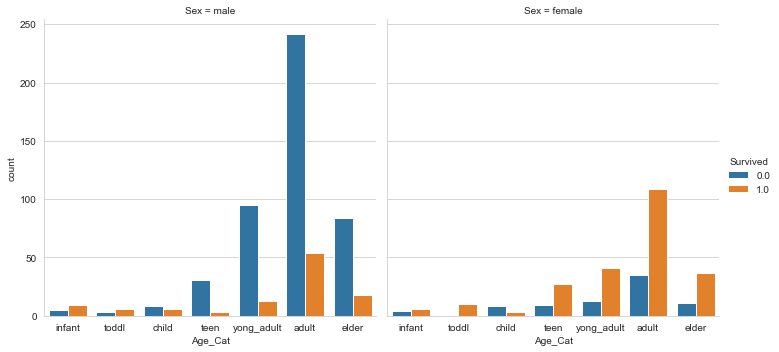

In [80]:
sns.catplot(x='Age_Cat',hue='Survived',col='Sex',kind='count',data=data.iloc[:891,:])
plt.show()

**Observation** : In both the males and females most infants and toddlers survived than perished, and in females all toddlers survived.
In females most children perished than survived. That is a very  different pattern as the other age groups all had more people survive than perish.
In males starting from children more people perished than survived. 
So we can say that most females survived than perished compared to males.

### How is Age distributed according to survived and pclass?

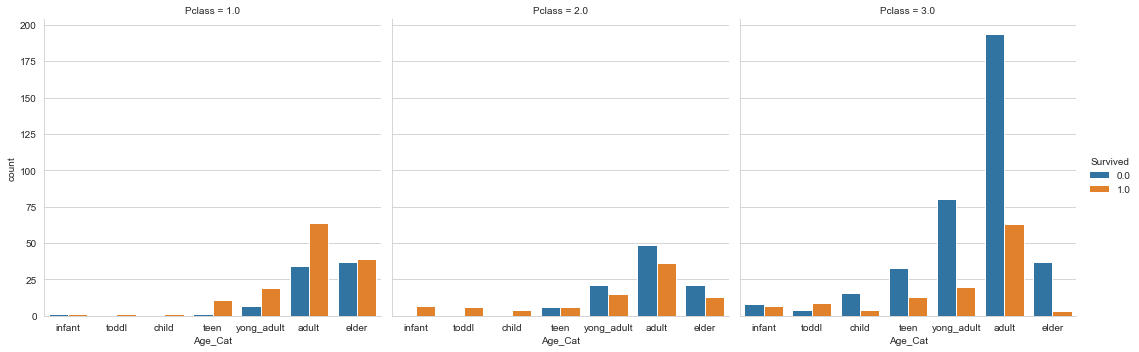

In [81]:
sns.catplot(x='Age_Cat',hue='Survived',col='Pclass',kind='count',data=data.iloc[:891,:])
plt.show()

**Observation** :In class 1 and 2 most people of all age groups survived. In class 2 infants, toddlers and children all survived. Class 3 had most people perishing.

### Feature Engineering on Name column
**Use concatenated data**

In [82]:
len(data['Name'].unique())

1307

In [83]:
data['Name'].dtype

dtype('O')

In [84]:
type(data['Name'][0])

str

In [85]:
data['Name'].sample(20)

1300                            Peacock, Miss. Treasteall
1211                          Andersson, Mr. Johan Samuel
336                             Pears, Mr. Thomas Clinton
304                     Williams, Mr. Howard Hugh "Harry"
1087                      Spedden, Master. Robert Douglas
1263                              Ismay, Mr. Joseph Bruce
944                            Fortune, Miss. Ethel Flora
242                       Coleridge, Mr. Reginald Charles
1251                          Sage, Master. William Henry
583                                   Ross, Mr. John Hugo
18      Vander Planke, Mrs. Julius (Emelia Maria Vande...
1308                             Peter, Master. Michael J
718                                   McEvoy, Mr. Michael
983                  Davidson, Mrs. Thornton (Orian Hays)
553                     Leeni, Mr. Fahim ("Philip Zenni")
459                                 O'Connor, Mr. Maurice
1135            Johnston, Master. William Arthur Willie""
105           

### Observations 

* The name column has 891 unique values.

* All the names are strings.From the names of a person we can see that there is some  data that we can get that is hidden there. 

* Almost every person has a title 'Mr','Miss','Dr','Mrs','Master'. One interesting tiltle is the 'Mlle' title for the `641` record(If it is a title).

* Also record number 822 has a very interesting title 'Jonkheer'(if it is a title).

* Record number 754 has a title of Capt which is also very rare and interesting.

* Some records have other people's names written in brackets. Like record 608,558 and 617.

* From what I am seeing it is records of married women(title is Mrs) that have the names in brackets.

* But not all people with Mrs title have the names in brackets.

* Record 706 has a Mrs title but no name in brackets.

* Maybe the people who's husbands were added are those who embarked with their husbands.

* Some people's names have names written within double quotation marks that come after the person's complete name.

* Records 22 and 706 have the names.

* From what I see the names in double quotation marks are nicknames.

* Anna has "Annie" and Florence is "Fannie". These names sound like nicknames and they match the names of the people they are next to.

> **`Hypothesis 1`** : The names written in brackets are the names of the men the women are married to.

> **`Hypothesis 2`** : The names could be the names of people that these people embarked with. So we will have to check where the people embarked then check to see the people who also embarked at the same place.

### Checking Hypothesis 2

In [86]:
#Look at the name of record 779 as it has the name in bracketand its Embarked
print(data['Name'][779],data['Embarked'][779])

Robert, Mrs. Edward Scott (Elisabeth Walton McMillan) S


In [87]:
# Store all the names of people who have the same Embaeked as the person in record 779
s=[]
for i in range(len(data)):
    if data['Embarked'][i]=='S':
        s.append(data['Name'][i])
        
        

In [88]:
# Seperate the names by letters so that they can be easier to analyse as the original list of namess has a lot of names
e=[]
w=[]
m=[]
for i in range(len(s)):
    if s[i][0]=='E':
        e.append(s[i])
    elif s[i][0]=='W':
        w.append(s[i])
    elif s[i][0]=='M':
        m.append(s[i])

In [89]:
#Look at the names that start with e
e

['Ekstrom, Mr. Johan',
 'Elsbury, Mr. William James',
 'Eitemiller, Mr. George Floyd',
 'Edvardsson, Mr. Gustaf Hjalmar',
 'Eklund, Mr. Hans Linus',
 'Emanuel, Miss. Virginia Ethel',
 'Everett, Mr. Thomas James',
 'Enander, Mr. Ingvar']

In [90]:
#Look at the names that start with w
w

['Williams, Mr. Charles Eugene',
 'Wheadon, Mr. Edward H',
 'Woolner, Mr. Hugh',
 'West, Miss. Constance Mirium',
 'Waelens, Mr. Achille',
 'White, Mr. Richard Frasar',
 'Webber, Miss. Susan',
 'White, Mr. Percival Wayland',
 'Weisz, Mrs. Leopold (Mathilde Francoise Pede)',
 'Watt, Mrs. James (Elizabeth "Bessie" Inglis Milne)',
 'Williams, Mr. Howard Hugh "Harry"',
 'Wick, Miss. Mary Natalie',
 'Williams-Lambert, Mr. Fletcher Fellows',
 'Wiklund, Mr. Jakob Alfred',
 'Widegren, Mr. Carl/Charles Peter',
 'Wiseman, Mr. Phillippe',
 'West, Mr. Edwy Arthur',
 'West, Mrs. Edwy Arthur (Ada Mary Worth)',
 'Windelov, Mr. Einar',
 'Webber, Mr. James',
 'Walker, Mr. William Anderson',
 'Wright, Mr. George',
 'Willey, Mr. Edward',
 'Wilhelms, Mr. Charles',
 'Watson, Mr. Ennis Hastings',
 'Weir, Col. John',
 'Williams, Mr. Leslie',
 'Wells, Miss. Joan',
 'Wick, Mrs. George Dennick (Mary Hitchcock)',
 'Wilkes, Mrs. James (Ellen Needs)',
 'Wirz, Mr. Albert',
 'Wells, Master. Ralph Lester',
 'Weisz, M

In [91]:
#Look at the names that start with m
m

['McCarthy, Mr. Timothy J',
 'Moen, Mr. Sigurd Hansen',
 'Moutal, Mr. Rahamin Haim',
 'Mionoff, Mr. Stoytcho',
 'Moss, Mr. Albert Johan',
 'Moore, Mr. Leonard Charles',
 'Madsen, Mr. Fridtjof Arne',
 'Meo, Mr. Alfonzo',
 'Mellors, Mr. William John',
 'Maenpaa, Mr. Matti Alexanteri',
 'Mellinger, Mrs. (Elizabeth Anne Maidment)',
 'Mineff, Mr. Ivan',
 'Moraweck, Dr. Ernest',
 'McKane, Mr. Peter David',
 'Meek, Mrs. Thomas (Annie Louise Rowley)',
 'Matthews, Mr. William John',
 'Mellinger, Miss. Madeleine Violet',
 'Millet, Mr. Francis Davis',
 'Morley, Mr. William',
 'Milling, Mr. Jacob Christian',
 'Maisner, Mr. Simon',
 'Molson, Mr. Harry Markland',
 'Maioni, Miss. Roberta',
 'McGough, Mr. James Robert',
 'Meanwell, Miss. (Marion Ogden)',
 'Murdlin, Mr. Joseph',
 'Mitkoff, Mr. Mito',
 'Mitchell, Mr. Henry Michael',
 'Madill, Miss. Georgette Alexandra',
 'Morley, Mr. Henry Samuel ("Mr Henry Marshall")',
 'McNamee, Mr. Neal',
 'Marvin, Mr. Daniel Warner',
 'Moor, Master. Meier',
 'Mack, 

From the output above it seems that the names are not there is the people that embarked with the person in record 779.
So we can say that the names are not the nmaes of people the people embarked with.

### Checking Hypothesis 1

In [92]:
# Extract the names in  brackets from the people's names
lst=[]
lst.append(data['Name'][513])
lst.append(data['Name'][254])
lst.append(data['Name'][279])

names=[]
for i in range(len(lst)):
    for n in range(len(lst[i])):
        if lst[i][n]=='(':
            names.append(lst[i][n+1:(len(lst[i])-1)])
            
names
            

['Elizabeth L. Barrett', 'Helena Wilhelmina', 'Rosa Hunt']

In [93]:
# Search for the names in the data and append them in the lists men
men=[]
for n in range(len(names)):
    for i in range(len(data)):
        s="".join(itertools.takewhile(lambda x:x!=" ",names[n]))
        if data['Name'][i][0:len(s)]==s: #This line of code
            men.append(data['Name'][i])
        
        

In [94]:
men

[]

The names are not appearing in the names from the dataset, which means it is names of people who were not on the Titanic.

#### The names however seem to have other hidden information. Every person has a title which suggests that the person is married, is a Dr, not married, Mr, Miss, Rev etc.
#### We will therefore create a new feature.

In [95]:
data['Titles']=0

In [96]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Cat,Titles
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,yong_adult,0
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult,0
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult,0
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult,0
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult,0


In [97]:
# Extract the titles
for i in range(len(data)):
    s=data['Name'][i].split(",")  #Here we are splitting the name into two. We are spitting the name where there is a coma. We will have a lit with 2 elements, the first one is the strings before the coma and the second one is the strings after the coma.
    n=s[1].split(".")              #Here we are splitting the second strings in the list. We are splitting after the full stop.
    data['Titles'][i]=n[0]

C:\Users\Student\Anaconda2\envs\Real_Useful_Python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Student\Anaconda2\envs\Real_Useful_Python\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [98]:
data.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Cat,Titles
384,385,0.0,3.0,"Plotcharsky, Mr. Vasil",male,29.0,0,0,349227,7.8958,S,adult,Mr
475,476,0.0,1.0,"Clifford, Mr. George Quincy",male,29.0,0,0,110465,52.0000,S,adult,Mr
913,914,nan,1.0,"Flegenheim, Mrs. Alfred (Antoinette)",female,29.0,0,0,PC 17598,31.6833,S,adult,Mrs
276,277,0.0,3.0,"Lindblom, Miss. Augusta Charlotta",female,45.0,0,0,347073,7.7500,S,elder,Miss
575,576,0.0,3.0,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,S,yong_adult,Mr
164,165,0.0,3.0,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,S,infant,Master
741,742,0.0,1.0,"Cavendish, Mr. Tyrell William",male,36.0,1,0,19877,78.8500,S,adult,Mr
845,846,0.0,3.0,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,S,elder,Mr
342,343,0.0,2.0,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,S,adult,Mr
608,609,1.0,2.0,"Laroche, Mrs. Joseph (Juliette Marie Louise La...",female,22.0,1,2,SC/Paris 2123,41.5792,C,yong_adult,Mrs


In [99]:
data['Name'][18]

'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'

In [100]:
len(data['Titles'].unique())

18

In [101]:
print(data['Titles'].unique())

[' Mr' ' Mrs' ' Miss' ' Master' ' Don' ' Rev' ' Dr' ' Mme' ' Ms' ' Major'
 ' Lady' ' Sir' ' Mlle' ' Col' ' Capt' ' the Countess' ' Jonkheer' ' Dona']


**Titles explained:**

1. Mr Refers to an unmarried or married man.
2. Mrs refers to a married woman.
3. Miss refers to an unmarried woman.
4. Master refers to an underage male or a male that is under 18. Once the oerson turns 18 the title is changed to Mr.
5. Don refers to a man.It is a spanish title. It is like Mr in English.
6. Rev refers to an appointed religious leader.
7. Dr refers to a person with a doctorate degree or a medical doctor.
8. Mme is a French title referring to an unmarried woman.It is equivalent to the Miss title in English.
9. Ms is the title used by a married or unmarried woman.
10. Major refers to a person with a military rank standing above a captain.
11. Lady is a title used by women with a title of nobility or a wife of a Lord. It is also used by daughters of higher-ranking noobles duke,marques or earl. Noble families are families that are related to Royal families but they are ranks below the King.
12. Sir is the title used to refer to a man with the rank of a knight or baronet.
13. Mlle(Mademoiselle) is the French equivalent of Miss, and so it refers to an unmarried woman.
14. Col(Colonel) refers to a person with a senior military officer rank.
15. Capt(Captain) refers to aperson who is a serving officer in the airforce,marines or marines with a rank below the major.
16. Countess refers to the wife or widow of a count or an earl. Counts are are people who are in the middle of social hierarchy , they are not at the level of king and queen but they are not commoners.
17. Jonkheer refers to Young Lord or young lady. It is the title given to an unmarried young child of a high-ranking knoght or nobleman.

### How are titles distributed?

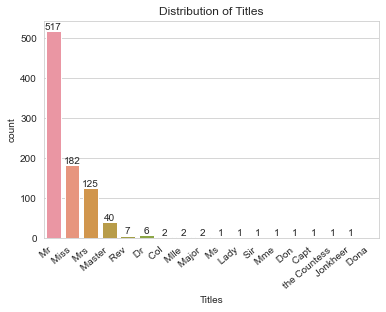

In [102]:

ax=sns.countplot(data=data.iloc[:891,:],x="Titles",order=data['Titles'].value_counts(ascending=False).index)  #Sort the plots in descending order with the order argument 

ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")

values=data.iloc[:891,:]['Titles'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0],labels=values)
plt.title("Distribution of Titles")
plt.show()

The majority of the people are men with the title Mr(whether married or not married), followed by women with the title Miss(unmarried women).There are also many women with title Mrs(married women).There are very few people with the titles Rev,Dr,Mllee,Col and Major. There was one Countess, Captain, Ms, Sir,Lady, Mme, Don and one Jonkheer. So we can conclude that there were few high-ranking individuals in the Titanic.

### How are titles distributed according to the target variable?

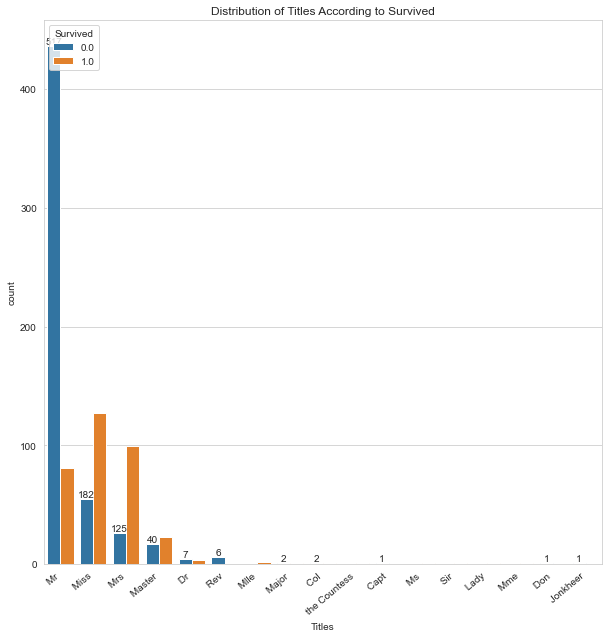

In [103]:
plt.figure(figsize=(10,10))
ax=sns.countplot(data=data.iloc[:891,:],x="Titles",hue="Survived",order=data.iloc[:891,:]['Titles'].value_counts(ascending=False).index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")  #Here we are rotating the xlabels so that they all show correctly and they do not overlap
values=data.iloc[:891,:]['Titles'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0],labels=values)
plt.title("Distribution of Titles According to Survived")
plt.show()

For people with the title Mr most people perished. For the titles Mrs, Miss and Master most people survived,very few perished. For Drs people perished and people survived were almost the same number. For the Rev, Major and Colonel, Captain, Don and Jonkheer titles all people perished. For Mlle, Ms,Lady and Mme titles all people survived.
From this plot we can conclude that most people with titles Miss,Master and Mrs survived. In general we could say that females and kids were the ones that survived the most.

### Embarked Distribution According to Class

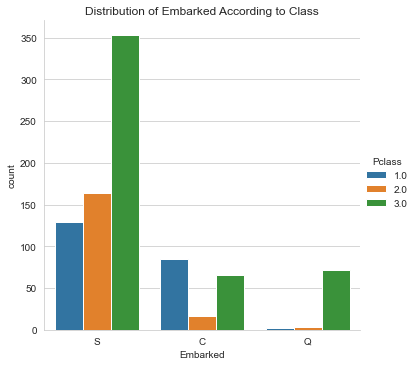

In [104]:
sns.catplot(x="Embarked",hue="Pclass",kind="count",data=data.iloc[:891,:])
plt.title("Distribution of Embarked According to Class")
plt.show()

### Embarked Distribution According to Class and Target Variable

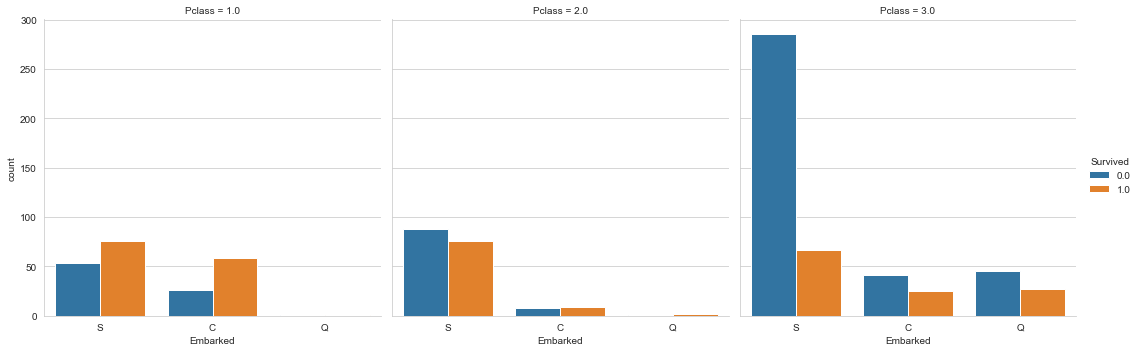

In [105]:
sns.catplot(x="Embarked",hue="Survived",col="Pclass",kind="count",data=data.iloc[:891,:])
plt.show()

## Data Check
---

* It is very important to check if the data is in the correct format before we train machine learning models.
* One requirement of machine learning models is that data must be numerically represented.
* Some of the data in the dataset is not numeric, and so we will have to make it numeric.

In [106]:
data.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Cat,Titles
517,518,0.0,3.0,"Ryan, Mr. Patrick",male,29.0,0,0,371110,24.1500,Q,adult,Mr
220,221,1.0,3.0,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,S,teen,Mr
715,716,0.0,3.0,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,S,yong_adult,Mr
1145,1146,nan,3.0,"Wenzel, Mr. Linhart",male,32.5,0,0,345775,9.5000,S,adult,Mr
679,680,1.0,1.0,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C,adult,Mr
792,793,0.0,3.0,"Sage, Miss. Stella Anna",female,29.0,8,2,CA. 2343,69.5500,S,adult,Miss
330,331,1.0,3.0,"McCoy, Miss. Agnes",female,29.0,2,0,367226,23.2500,Q,adult,Miss
633,634,0.0,1.0,"Parr, Mr. William Henry Marsh",male,29.0,0,0,112052,0.0000,S,adult,Mr
371,372,0.0,3.0,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,S,teen,Mr
559,560,1.0,3.0,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",female,36.0,1,0,345572,17.4000,S,adult,Mrs


* The variables Name, Age and Ticket I will not consider for building the machine learning model.
* For the Name variable I managed to  extract the important data. And names on their own have no predictive power.
* For the Age coumn,I already transformed the column and again there will be no need for me to use the column.
* For Ticket, I cannot use that column as the Ticket numbering system used in Titanic dataset may not be the same as the Ticket numbering system used elsewhere.

> ### Encoding Variables

> * There are two types of data, numeric and categorical.
> * Numeric data that is quantitative(composed of numbers). It includes `integers` and `continuous/float` data.
> * Categorical data that is qualitative(composed of categories/labels). It includes `nominal` and `ordinal` label data.
 
> 1. **`Ordinal Data`** - It is categorical data that has a natural ordering. Example is first 1st floor, 2nd floor, 3rd floor. We know that 1st floor comes before 2nd floor and 3rd floor, and 2nd floor comes before 3rd floor. There is an order, as the floors either come before or after the other. In our dataset the `Age_Cat` column is ordinal. We know that an infant is younger than an adult.

>   * We use `Ordinal Encoding` to encode ordinal variables.
>   * In ordinal encoding each category is given an integer value beginning at zero.

> 2. **`Nominal Data`**- It is categorical data that does not have a natural ordering. An example is Sex.No Sex(female or male) comes after the other or before the other. There is no natural rank for Sex.
    * We use `One-Hot-Encoding ` to encode nominal variables.
    * In one-hot-encoding we make a binary variable for every category. So if we have 3 categories, we will have 3 dummy variables. Wherever a certain category was appearing(in terms of rows) the dummy variable for that category will have a 1 and the other dummy variables will have a 0.
>        * **Disadvantages of One-Hot Encoding** :
>           1. Because it create a dummy variable for every category, it uses a lot of memory.
>           2. It gives rise to multicollinearity/ the Dummy variable trap.          
>        * **The Dummy Variable Trap** 
>          * When a variable is a categorical variable and we wish to make to numerical for machine learning purposes,we use one-hot encoding which involves creating dummy variables for each category that was in the original variable.
>          * If we had 2 categories,say male and female, we would have dummy variables for each category.
>          * Say we have the following data: 
>          * 
           
  | Sex | Age |
           | --- | --- |
           | Male | 13 |
                  | Female | 12 |
                      |Female | 10 |
                      | Male | 1 |          
>   * The column Sex is categorical, so before we train a machine learning model we would need to encode the column, say using one-hot encoding.
>   * If we were to do that we would have the following data:
          
  | Female | Male | Age|
  | --- | --- | --- |
  | 0 | 1 | 13 |
  | 1 | 0 | 12 |
  | 1 | 0 | 10 |
  | 0 | 1 | 1 |
          
          
>  * The problem here is that if we know that Female column is 1,then we know that the Male column is 0, and vice vesa.
>  * So that mens that the feature variables Male and Female have a rekationship,i.e they are related. Wecall that muticollinearity.
>  * Multicollinearity occurs when independent variables have a relationship.
>  * We can model the relationship between the two variables as : `Female=1-Male`.
>  * Multicollinearity is bad because the model being trained will not be able to tell which variable strongly affects the target variable as the variables are related, and therefore seem to have the same effect.
>  * This is solved by droppig the first column of the dummy variables created.
          
           

> * We can use the ColumnTransformer class in scikitl-learn to perform the transformations/encodings on the columns at the same time.
> * Sex and Titles are nominal and so we would have to use one-hot encoding, but according to [Machine Learning Mystery](https://machinelearningmastery.com/feature-selection-with-categorical-data/), it is not a good idea to do one hot encoding when you are going to perform feature selction. So we will do ordinal encoding on all the variables.
> * Age_Cat is ordinal and so we will use ordinal encoding.

Sources: [Machine Learning Mystery](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/#:~:text=In%20this%20case%2C%20a%20one,bit%20represents%20a%20possible%20category.), [Machine Learning Mystery](https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/) ,[Medium](https://towardsdatascience.com/one-hot-encoding-multicollinearity-and-the-dummy-variable-trap-b5840be3c41a) and [Towards Data Science](https://towardsdatascience.com/beware-of-the-dummy-variable-trap-in-pandas-727e8e6b8bde)



### Encode the target variable

In [107]:
y_train=train['Survived']


In [108]:
frame={'Target':y_train}
y_train=pd.DataFrame(frame)



In [109]:
y_train

,Target
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [110]:
# Create a dictionary taht willhelp us map integer valued to the categories in the target column

nums={"Target":{"0.0":0, "1.0":1}}


# Replace the values using the dictionary and the replace function
y_train=y_train.replace(nums)

In [111]:
y_train

,Target
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


#### Join the train and test dataset so that we can do all the pre-processing on the test data as well

### Encode feature variables

#### 1. Ordinal encode variables.


* Some columns I will not use for further analysis and processing because intuitively Iknow that they are useless at predicting. The columns I will not be using are 
* Ticket,Name,Embarked, PassangerID and Age. For Age and Name we have already done some feature engineering using these columns, so having them in the model will be creating redundancy as there are columns extracted from them.
* For the Ticket variable, if we wish to predict whether a person will perish, we might be using a different Ticket generating system which means there will be no correlation of the new tickets with the target variable.
* Passanger ID is also useless as it was only used to identify an individual person. 

* The column will be encoded individually then concatenated at the end The reason for this is that I want to be the one to choose how levels are assigned, I do not want them to be done automatically, as I will not be able to know which value is encoded as what level.

In [112]:
var=pd.DataFrame()
var["Titles"]=data["Titles"]
var["Sex"]=data["Sex"]
var["Pclass"]=data["Pclass"]
var["Age_Cat"]=data["Age_Cat"]


In [113]:
var.head()

,Titles,Sex,Pclass,Age_Cat
0,Mr,male,3.0,yong_adult
1,Mrs,female,1.0,adult
2,Miss,female,3.0,adult
3,Mrs,female,1.0,adult
4,Mr,male,3.0,adult


In [114]:
#Keep the names of the columns for future use

cols=list(var.columns)

In [115]:
cols

['Titles', 'Sex', 'Pclass', 'Age_Cat']

In [116]:
var["Titles"].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer', ' Dona'], dtype=object)

In [117]:
titles=pd.DataFrame()
titles["Titles"]=var["Titles"]
titles

,Titles
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
1304,Mr
1305,Dona
1306,Mr
1307,Mr


In [118]:
# Encode titles column and specify the levels/categories
tit_categories=[" Mr"," Mrs"," Miss"," Master"," Don"," Rev"," Dr"," Mme"," Ms"," Major"," Lady"," Sir"," Mlle"," Col"," Capt"," the Countess"," Jonkheer"," Dona"]
tit_categories=list(np.array(tit_categories).reshape(1,18)) #Categories should be made an array of size (number of features,number of categories). Then the array should be made a list.
                                                            # The number of features here is 1, because we are only dealing with titles.
transf=ColumnTransformer(transformers=[('cat',OrdinalEncoder(categories=tit_categories),["Titles"])])
#titles=var["Titles"]
titles=transf.fit_transform(titles)

In [119]:
titles

array([[0.],
       [1.],
       [2.],
       ...,
       [0.],
       [0.],
       [3.]])

In [120]:
# Encode sex and specify the categories/levels
sex=pd.DataFrame()
sex["Sex"]=var["Sex"]

sex_categories=["male","female"]
sex_categories=list(np.array(sex_categories).reshape(1,2))
transf=ColumnTransformer(transformers=[('cat',OrdinalEncoder(categories=sex_categories),["Sex"])])
sex=transf.fit_transform(sex)
sex

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [121]:
# Encode class and specify the levels/categories
clas=pd.DataFrame()
clas["Pclass"]=var["Pclass"]

class_categories=["1.0","2.0","3.0"]
class_categories=list(np.array(class_categories).reshape(1,3))
transf=ColumnTransformer(transformers=[('cat',OrdinalEncoder(categories=class_categories),["Pclass"])])
clas=transf.fit_transform(clas)
clas


array([[2.],
       [0.],
       [2.],
       ...,
       [2.],
       [2.],
       [2.]])

In [122]:
#Encode age and specify levels/categories
age=pd.DataFrame()
age["Age_Cat"]=var["Age_Cat"]

age_categories=['infant','toddl','child','teen','yong_adult','adult','elder']
age_categories=list(np.array(age_categories).reshape(1,7))
transf=ColumnTransformer(transformers=[('cat',OrdinalEncoder(categories=age_categories),["Age_Cat"])])
age=transf.fit_transform(age)
age

array([[4.],
       [5.],
       [5.],
       ...,
       [5.],
       [5.],
       [5.]])

In [123]:
# Combine the encoded column
ordi=titles
ordi=np.c_[ordi,sex]
ordi=np.c_[ordi,clas]
ordi=np.c_[ordi,age]
ordi

array([[0., 0., 2., 4.],
       [1., 1., 0., 5.],
       [2., 1., 2., 5.],
       ...,
       [0., 0., 2., 5.],
       [0., 0., 2., 5.],
       [3., 0., 2., 5.]])

In [124]:
# Keep a dictionary of the categories and the labels for model implementation(testing)

labels={"Titles":{" Mr":0," Mrs":1," Miss":2," Master":3," Don":4," Rev":5," Dr":6," Mme":7," Ms":8," Major":9," Lady":10," Sir":11," Mlle":12," Col":13," Capt":14," the Countess":15," Jonkheer":16," Dona":17},
       "Sex":{"male":0,"female":1},
       "Pclass":{"1.0":0,"2.0":1,"3.0":2},
       "Age":{"infant":0,"toddl":1,"child":2,"teen":3,"yong_adult":4,"adult":5,"elder":6}}

In [125]:
labels["Titles"]

{' Mr': 0,
 ' Mrs': 1,
 ' Miss': 2,
 ' Master': 3,
 ' Don': 4,
 ' Rev': 5,
 ' Dr': 6,
 ' Mme': 7,
 ' Ms': 8,
 ' Major': 9,
 ' Lady': 10,
 ' Sir': 11,
 ' Mlle': 12,
 ' Col': 13,
 ' Capt': 14,
 ' the Countess': 15,
 ' Jonkheer': 16,
 ' Dona': 17}

In [126]:
labels["Sex"]

{'male': 0, 'female': 1}

In [127]:
labels["Pclass"]

{'1.0': 0, '2.0': 1, '3.0': 2}

In [128]:
labels["Age"]

{'infant': 0,
 'toddl': 1,
 'child': 2,
 'teen': 3,
 'yong_adult': 4,
 'adult': 5,
 'elder': 6}

In [129]:
labels["Age"]["infant"]

0

In [130]:
labels["Age"]["teen"]

3

In [131]:
ordi.shape

(1309, 4)

In [132]:
# Append the nominal array to the ordinal array

X=ordi

In [133]:
X.shape

(1309, 4)

In [134]:
len(cols)

4

In [135]:
X

array([[0., 0., 2., 4.],
       [1., 1., 0., 5.],
       [2., 1., 2., 5.],
       ...,
       [0., 0., 2., 5.],
       [0., 0., 2., 5.],
       [3., 0., 2., 5.]])

In [136]:
# Make a dataframe of Fare,SibsP and Parch so we can add to the X_train

ext=pd.DataFrame()
ext['Fare']=data['Fare']
ext['Parch']=data['Parch']
ext['SibSp']=data['SibSp']


In [137]:
# Change the dataframe to an array
ext=ext.values

In [138]:

ext

array([[ 7.25  ,  0.    ,  1.    ],
       [71.2833,  0.    ,  1.    ],
       [ 7.925 ,  0.    ,  0.    ],
       ...,
       [ 7.25  ,  0.    ,  0.    ],
       [ 8.05  ,  0.    ,  0.    ],
       [22.3583,  1.    ,  1.    ]])

In [139]:
#Append the column names Fare, Parch and SibSp to the column name
cols.append("Fare")
cols.append("Parch")
cols.append("SibSp")

In [140]:
cols

['Titles', 'Sex', 'Pclass', 'Age_Cat', 'Fare', 'Parch', 'SibSp']

In [141]:
X

array([[0., 0., 2., 4.],
       [1., 1., 0., 5.],
       [2., 1., 2., 5.],
       ...,
       [0., 0., 2., 5.],
       [0., 0., 2., 5.],
       [3., 0., 2., 5.]])

In [142]:
# Column join the array of Fare,SibSp and Parch to the feature array(X)

X=np.c_[X,ext]

In [143]:
X

array([[ 0.    ,  0.    ,  2.    , ...,  7.25  ,  0.    ,  1.    ],
       [ 1.    ,  1.    ,  0.    , ..., 71.2833,  0.    ,  1.    ],
       [ 2.    ,  1.    ,  2.    , ...,  7.925 ,  0.    ,  0.    ],
       ...,
       [ 0.    ,  0.    ,  2.    , ...,  7.25  ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  2.    , ...,  8.05  ,  0.    ,  0.    ],
       [ 3.    ,  0.    ,  2.    , ..., 22.3583,  1.    ,  1.    ]])

In [144]:
X.shape

(1309, 7)

In [145]:
#Split the data into train and test data
X_train=X[:891,]
X_test=X[891:,]

In [146]:
X_train.shape

(891, 7)

In [147]:
X_test.shape

(418, 7)

In [148]:
# Transform target variable using ordinal encoding because we will be doing a classification problem

#lab_enc=LabelEncoder()  # What does this function do?
#lab_enc.fit(y_train)   #What does this line do?
#y_train=lab_enc.transform(y_train)  #Why do we transform after fitting?

#y_train

## Feature Selection
---

> Feature Selection is the process of selecting certain features from the original features of a dataset, The features that are selcted are those that have great prediction power, i.e features that have a relationship with the target variable and would therefore be of great use when developing a predictive model. Feature selection has the following advantages:
> 1. Feature selection reduces the number of features used when building a predictive model, which therefore reduces the `computational cost`.
> 2. The selected features are features that have great correlation with the target variable, and that results in a model with great accuracy.


> There are two types of feature selection techniques:
> 1. **Supervised feature selection** - Removes irrelevant variables using the target variable.There are three types of supervised feature selection:
    * Wrapper
    * Filter
    * Intrinsic
> * **Wrapper feature selection** - These methods create many models with different subsets of the input features. The features that give the best performing model are chosen. An example of this type of method is the `REF(Recursive Feature Elimination)`.
>    * **Disadvantage** : This method is computationally expensive.

> * **Filter feature selection** - Statistical scores are used to  assess the relationship of the variable with the target. The scores are used to select the features that will be used for the model. 
      1. Statistical methods - These methods assesses the variabes outside of the model.
      2. Feature importance methods - These methods assesses the variabes inside of the model.

> * **Intrisic feature selection** - These methods do feature selection automatically during the training of the model, i.e intrisic feature selection is built-in on some models. Models with intrisic feature selection only include features that will give maximum accuracy. Examples of models with intrisic feature selection are `Lasso`, `Decision trees`, and `Random Forest`.

> 2. **Unsupervised feature selection** - removes redundant variables using correlation. The target variable is ignored.


Source: [Machine Learning Mystery](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/)

## Supervised Feature Selection 


### Recursive Feature Elimination


In [149]:
X_train.shape[1]

7

In [150]:
y_train.shape

(891, 1)

In [151]:

X_train.shape

(891, 7)

In [152]:
len(cols)

7

In [153]:

random.seed(1)
rfe=RFE(estimator=DecisionTreeClassifier(),n_features_to_select=10)
rfe.fit(X_train,y_train)

#Get columns selected and their ranks

for i in range(X_train.shape[1]):
    print("Column %d:, Name %s, Selected %s ,Rank %.3f"%(i,cols[i],rfe.support_[i],rfe.ranking_[i]))


Column 0:, Name Titles, Selected True ,Rank 1.000
Column 1:, Name Sex, Selected True ,Rank 1.000
Column 2:, Name Pclass, Selected True ,Rank 1.000
Column 3:, Name Age_Cat, Selected True ,Rank 1.000
Column 4:, Name Fare, Selected True ,Rank 1.000
Column 5:, Name Parch, Selected True ,Rank 1.000
Column 6:, Name SibSp, Selected True ,Rank 1.000


C:\Users\Student\Anaconda2\envs\Real_Useful_Python\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


* From the above output we can see that all features are selected.




### Feature Importance

* Feature importance is a grpup of techniques that assign scores to features that show the importance of each feature for modeling.
* Feature importance techniques can be applied for both regressiona and classification problems.
* The scores used here are obtained from a model that has been fit on the data. 
* The importance scores therefore, we can say they give us insights of the model used in terms if which features were most iseful and least useful during prediction.
* Feature importance improves model performance as the scores are used to eliminate the least important features, thereby reducing the number of features, which in turn results in low computational cost.
* There are many feature importance techniques. For this project we will explain on only 3 of them and then choose whci one to use:
1. **Coefficient Feature Importance**
   * In linear machine learning algorithms the final model is a `weighted` sum of the input features.
   * The weights are the coefficients that were found during model training for each input feature, and they are used to make a prediction. E.g. **`y=B0+B1x1+B2x2`**, where y is the dependent variable, x1 and x2 are feature variables,and B1, and B2 are weights/coefficients of the model.
   * These weights/coefficients are used to determine which feature is most important in Coefficient Feature Importance technique. 
  
* **Disadvantages**:
    - 1. If the data is not standardised, the coefficients cannot be used for feature importance. This is because if data is not standardized, the features are at different ranges, and that would cause their coefficents to be very different as well and therefore not offer insights into how important a certain feature is.
    - 2. Different linear models may have different opinions about the importance of some features. Some linear model would decide one feature is important , whilts another decides that it is not. So if we used one linear model to check the importance of features, then trained the data using another linear model we would get dissapointing results. 
    - 3. The data could have collinear features. Linear models require data to not have collinear features. So the presence of collinearity in the data could result in wrong interpretation of the importance of features.


2. **Feature Importance as Decision Tree**
    * Decision tree are are non-parametric models used for both classification and regression.
    * **Non-parametric models and parametric models**
        * Non-parametric models are models that do not assume the function of data and do not rely on parameters to make predictions.
        * Parametric models on the other side assume the function of data and rely on parameters/coefficients to make preddictions. Examples of parametric models are linear models like `Linear Rgression`, `Lasso Regression` etc.
        * Linear models make an assumption that the data has a linear function and therefore model the data using a linear function. They then find the parameters/coefiicients of the variables so that predictions can be made.
        * Non-parametric models on the other side, do not make any assumptions about the function of the data. They instead find a function that fits the data almost accurately, be it linear or not.
        * Non-parametric models are said to be more accurate when fitting the data because some data may not be linear, and non-parametric models will approximate the fuction that fits the data perfectly instead of assuming a certain function. Examples of non-parametric function are non-linear models such as `Support vector machine`,`Bagging`, `Boosting` and `Decision trees`.
    * Decision tree are made up of branches and nodes.
    * Each node has a feature that has to be evaluated.
    * The evaluation helps split the observations during training or make a data point follow a certain path when making predictions.
   * Deciosn Trees have a growth-stop condition whic specifies how deep the tree should be, the minimum samples a node should have or minimum reduction in the error metric.
    
    * Decision trees are made up of three types of nodes:
         * 1. **Root Node** - It is the first node in the tree. It evaluates the variable/feature that splits the ata best.
         * 2. **Intermediate Node** - Are the middle nodes where the variables/features are evaluated.
         * 3. **Leaf Nodes** - Are the last nodes of the tree and where the predictions are made.
         
    * **How are Decision Trees Trained?** 
       * The training data samples are recursively split by evaluating features that are the suitable.
       * The spitting is done by evaluating metrics like Gini index, the Entropy and Mean Squared Error.
       * The splitting process is different for numerical and discrete data.
       * When splitting discrete data all possible values are evaluated.
       * This means we will have N computed metrics for each variable  where N is possible values for each categorical variable.
       * For continuous features mean of two consecutive values of the data are used as thershold. 
       *
       *
       * **1. Training for Classification Task**
         - When the training begins, we have only the root node.
         - The root node has the total samples of feature variables.
         - The value variable gives a count of how many samples we have of each class.
         - Say we want to classify an animal as a dog, cat or a rabiit, and we have feature variables of `length_hair`(length of hair), `size_animal`(size of animal) and `lenght_tail`(length of tail).
         - The metric used for classification is the **Gini index**.
         - The Gini index is a metric used to measure how frequently a randomly chosen element of a certain feature would be incorrectly identified or classified.
         - And so we desire a minimum Gini index as it says that the an element of a feature would be less likely to be incorrectly classified/identified.
         - Gini index is calculated for each feature(`length_hair`,`size_animal` and `lenght_tail`), and the feature with the lowest Gini index is used for splitting.
         - Say the Gini index of `length_tail` is the lowest, length_tail will be used for splitting.
         - Say the thershold for splitting is length_tail>=0.5.
         - The following picture shows the Root node.]
         -
         ![alt text](RootNode.png "Root Node")
         -
         - For samples that have the length_tail>=0.5 they will go to the left(True for threshold) and the others will go to the right(False for threshold). 
         - Say 120 consisting of 20 Dog samples, 80 Cat samples and 20 Rabbit samples) samples go to the left node and 180 samples(80 Dogs,20 Cat,80 Rabbit) go to the right node.
         - The Gini is again computed for each feature in each node.
         - Say for left node the feature with the lowest Gini is the `length_hair` with a threshold of <25 , and for the right node it is the `length_tail` with a thershold of <=0.32.
         - The picture depicts the tree.
         -
         ![alt text](ResultingNodes.png "Resulting Nodes")
         -
         - Say 100 sample of the left node go to the left(True for threshold) and 20 go to the right(False for threshold), 
         - For the right node 80 samples got to the right(False for threshold) and 100 samples go to the left(False for threshold).
         -
         - The picture depicts the tree.
         -
         ![alt text](FinalTree.png "Full Tree")
         -
         - As can be seen on the tree the 2nd leaf node in the tree and the 4th leaf node have Gini values of 0. That means that the nodes only consist of features of one class.
         - The Gini values of the other nodes is not zero, but the tree has stopped splitting. We can assume that the condition of the tree specified that the tree should have a depth of 3. If that was not the case, the nodes with Gini values that are not zero would have continued splitting.
         - We should notice that the 2nd and 4th leaf nodes consist of ne class.The second leaf node consists of the Dog class and the 4th leaf node also consists of the Dog class.
         - So when testing, if the data beinfg tested moves until it reacjes these two nodes, the data will be classifed as the classes there,i.e as the Dog class.
         - But if there were two or more classes like the 1st and 3rd leaf nodes, we would do things differently(That will be discussed below).
         - The last nodes of the tree are called leaf nodes and that is where the prediction or classification happens.
         -
         -
         -
        * **Testing/Predicting for Classification Task**
        ---
        -
         - Say we have test data:
         
         | length_hair | size_animal | length_tail | Target |
         | --- | --- | --- | --- |
         | 2.3 | 1.3 | 4.5 | ? |
         
         - The data will start at the first Root node.
         - Then the fetaure being evaluated there will be checked.
         - The Rootnode evaluates the feature length_tail.
         - And so we will check if the length node in the test data meets the threshold stated in the root node.
         - If it does, the data moves to the left node, or else it goes to the right node.
         - In this case the data would move to the left as the threshold is met.
         - Then when we get there we also check the variable being evaluated.
         - The variable is length_hair. Theh we check if te variable length_hair of the test variable meets the threshold.
         - The variable length hair of the test data meets the thershold, and so the data moves to the left.
         - The left node is a leaf node, and a leaf node that consists of two classes, Cat and Rabbit class.
         - When that happens we look at the mode ofthe classes present there.
         - In this case the Cat class is the mode class, and so the test data would be classifed as cat.
         -
       * **2. Training for Regression Task**
         - We also start with the root node for this task.
         - The root node has all the samples,the threshold of a certain feature selected for the spitting task, the error(mse, etc but we will use mse for this example) and the mean value of the target variable of all the samples in the node(if we have 100 samples, we will calculate the mean price of all the samples).
         - Saywe want to predict the price of a t-shirt and we have the features `size`, and `amount_fab`.
         - The accuracy metric used is the Mean Squared Error.
         - The mse measures error in a model.
         - It subtracts the true observations from the predicted values and squares the answer.
         - So a high mse means the error in the model is high.
         - A small mse is the desired one as it means the error is small.
         -
         - Using the data in the root node, the mse for every feature is computed.
         - The feature that gives the lowest mse is used for the thershold and splitting of the data.
         - Say the feature `size` gives the lowest mse, meaning we will use it to split the data using the threshold size<=30.
         - The mean values of the prices is 21.3.
         - The following picture shows the root node:
         -
         -
         ![alt text](RegRoot.png "RegressionRoot")
         -
         -
         - Samples that have a size <=30 wil go to the left node(true for threshold) and those that have sizes that are not <=30 will go to the right node(false for threshold).
         - Say 30 samples got to the left and 70 samples go to the right.
         - Again, for both the nodes, the mse is calculated.
         - Say for the left node the feature that gives the lowest mse is the size feature with a thershold of size<=14.56. The mean of the prices is 20.5.
         - For the right node the feature that gives the lowest mse is the amount_fab with a threshold of amount_fab<=58.5. The mean of the prices is 18.6.
         - The picture below shows the resulting tree.
         -
         -
         ![alt text](RegResNodes.png "Resulting Reg Nodes")  
         -
         - For the left node, say all the samples meet the thershold(size<=14.56), that means no further splitting will occur.
         - For the right node, say 40 samples go to the left(meet the threshold) and 30 go to the right(do not meet the threshold).
         - The mse for the lefmost leaf is 0.0352 and the mse for the rightmost leaf is 0.025.
         - Let us assume the splitting stops when the mse reaches a value less than 0.1, so the tree will remain with 3 lea nodes.
         - The full tree is shown below:
         ![alt text](RegFinalTree.png "Final Regression Tree")
         -
         -  **Testing/Predicting for Classification Task**
         ---
         - Say we have test data:
         
         | size | Amount_fab | Target |
         | --- | --- | --- | 
         | 12 | 31 | ? |
        
        - The data will begin on first node.
        - The first node threshold is size<=30.
        - The size of the test data meets the thershold, and so the data moves to the left.
        - The leftmost leaf does not split further, and the value found there is 20.5.
        - That means the prediction for the test data is R20.5(if we assume the price is in Rands)
        
- **Gini index, Information Gain, and Enrtopy**
        - Decision tree have a way to check how good the splitting is.
        - while they are being trained, at each node an attribute/feature and a condition of that feature that best splits the data are found.
        - There are methods used to decide which feature and threshold best splits the data.
        - They are Entropy, Information Gain, Gain Ratio and Gini index.
- 1. **Entropy**
    * It is a measure of impurity and information content(The higher the entropy, the more impure the data, and therefore the more information there is to learn about the data).
    * It measures the purity each split would give  . i.e how mixed(in terms of classes) each data split is.
    * It is emasured from 0 to 1, but that also depends on the number of classess the data has.
    * A low entropy means the data is relatively pure(`mostly` consists of one class). While a high entropy means the data is very impure(has many classes mixed). A zero entropy value means the data is pure, i.e the data has only one class present.
    * How is the entropy used?
     - At the root node(whether it is the first root node or the middle root nodes), the split using each feature variable is explored.
     - Say we have 3 feature variables and 1 target variable with 4 classes.
     - First the split using the first feature will be explored.
     - The entropy of using that fetuare variable for splitting is calculated.
     - Then another feaure variable split is explored and the entropy that would result from that split, until the last feature.
     - Then the feature whose split gave the lowest entropy(lowest enrtopy means relatively pure) is used for the split,and new nodes are created using that features' split.
     - Entropy formula is : **Entropy**=$-\sum\limits_{i=1}^{n}p_{i}log_{2}(p_{i})$, where $p_{i}$ is the probability of each class.
- 2. **Information Gain**
     * It is used to measure which feature provides best/outstanding information about the classification based on the entropy.
     * **OR**
     * So we can say it is used to check which feature is most important.
     * **AND**
     * It uses the entropy to find out which feature best splits the data.
     *  It is the difference between the entropy of the parent node and the average of the entropies of the possible splits from the parent node for each feature.
     * Mathematical formula is : **Gain(S,A)** = $\text{Entropy(S)} - \sum_{\text{veValues(A)}}\frac{|S_{v}|}{|S|}\text{.Entropy}(S_{v})$, where S is the whole dataset, A is a certain attribute, Sv is a subset of S where A=v and Values(A) is the set of all possibe values of A.
     * How is Information Gain used?
     * **First we must know that Information Gain is used when the feature varibles are caegorical, or we can say it assumes the features are categorical**.
     * The splits of each feature variable are explored.
     * Say we have 3 feature variables and 1 target variable with 2 classes.
     * First the splitting according to the 1st feature variable is explored. The splits are equal to the number of possible values each fetaure has/the number of categories each feature has, so if a feature has 3 possible values/categories, the node will split 3 times.
     * The entropies for the splits of the 1st feature are computed.
     * Then the weighted averages of the entropies of each of the "possible leaf nodes/possible splits"(Total samples in leaf node/total samples in root node * leaf entrophy) are computed.
     * The sum of the weighted averages of the entropies of every split are subtracted from the entropy of the root node to give the Information Gain. 
     * The same is done for all the other features.
     * The feature with the highest information gain is the best feature for splitting, and the one with more infomrmation.
     * The value of information Gain cannot be negative.
     
     
 * **Depiction of Entropy and Information Gain Implementation**
  * Say we have the following data, with 2 nominal features and 1 target variable with 2 classes.
  * We are trying to predict whether someone will be sick or not( sick=1 not_sic=0) using the features sex and home(whether a person is homeless (0) or has a home(1)).
  * Note that both these features are nominal as the Infomration Gain only deals with nominal data.

| Sex | Home | Clothing | Sick |
| ---    | ---  | ---  | --- |
| Female | 1 | 1 | 1 |
| Female | 1 | 0 | 1 |
| Male | 0 | 1 | 0 |
| Female | 0 | 0 | 0 |

   
  * Initially the root node has this data. 
  * Since the implementation of Infomration Gain focuses on the purity and non-purity of data, we will have the following node showing the class purity of the first root node, not the feature values.
   
   ![alt text](InfoRoot.png "Root Node")
   
   * Next we have to split the data.
   * We have to explore each split for each feature variable and compute the gain for each feature.
   * 1. **When we split using the Sex feature** :
    ![alt text](SexSp.png "Slitting with Sex")
    
   * 2. **When we split with the Home Feature**
   ![alt text](SplitHome.png "Home Split")
   
   * 3. **When we split with the Clothing feature**
   
   ![alt text](SplitClo.png "Clothing Split")  
   
   * From the above tree we can see that the split that has the biggest information gain is the Home split, and so we will split using the Home feature variable.
   * Even when looking at the split by Home you can tell that Home is the best feature to split by as we have both leaf nodes having only one class.
   * Note that the splitting will not occur as the tree leaf nodes are pure.
  
 
- 3. **Gini index**
     * As mentioned earlir, a Gini index is a measure of how often a randomly selected element would be incorrectly classified.
     * And so we can say a feature with a low Gini index is the most desirable.
     * The formula for Gini index is : GiniIndex= $1-\sum_{j}p_{j}^2$ where $p_{j}$  is the probability of an object being classified to a particular class.
     
     * How is Gini index used?
      - First a root node with the whole data has to be split.
      - Note that Gini index is used when the feature variables are continuous, and so when splitting it uses thresholds and conditions to split the data.
      - The splitting of each feature and the thershold that splits the data best are explored.
      - For the first feature the thershold that would best split the data is found.
      - Once the threshold is found, for each unique category/value of the target variable the number of records that satisfy the threshold and belong to each category are found,
      - Then their probabilities are computed,i.e the probabaility of satisfying the threshold `and` belonging to a certain class.
      - The same is done for each unique category/value of the target variable that does not satisfy the threshold.
      - The Gini index is the computed using the two probabilities.
      
     
* **Depiction of Gini index**
 - Say we have the follwoing data. We are trying to classify a person's income as low or high. The faeatures used are income, working_hours and side_income.
 
 | Income | Working_Hours | Side_Income | Income_Class |
 |---| --- | --- | --- |
 | 4.3 |2 | 1 | High |
 | 5.2 | 3.2 | 2.2 | High | 
 | 1.2 | 3.4 | 3.2 | Low |
 | 4 | 2.2 | 2 | Low |
 | 7 | 3 | 2.3 | High |
 |7.2 | 4 | 1.1 | High |
 | 4.6 | 2.5 | 1.5 | Low |
 | 6 | 2.3 | 4 | High |
 
 * First the root node has all the data samples, therefore all the classes.
 * The data has theree attributes/features.
 * The tree has to decide whta attribute or feature to use to split the root node. All the attributes will be explored and their Gini indexes will be computed.
 * The first thing that will be done for each feature is to randomly select conditions or therhsold for each attribute.
 * Say the conditions for each feature are given as :
   1. **Income** >=4 .
      * If income is not >=4 then it is <4. This is the alternate condtition if the main codition is not satisfied.
   2. **Working_Hours** <=2. 
      * If Working hours are not <=2 then they are >2. This is the alternate comdition if the main condition is not satisfied.
   3. **Side_Income** >=2. 
      * If side income is not >=2 then it is <2. This is the alternate condition if the main condition is 
      
 * Then we must calculate the probability of a record satisfying each condition for each attribute and being in Income_Class=High or Low. Conditions of each attribute :
 1. **Income**:
    * Income>=4:
      * For this condition we have the class High appearing 5 times, and the class Low appearing 2 times.
      * This means (Income>=4 and Income_Class=High )=5 and (Income>=4  and Income_Class=Low)=2.
      * In total the records that satisfy this condtion in the data are 7, and so the probabiity must be calculated with respect to this total value.
      * Then the probability of Income>=4 and Income_Class=High =$ \frac{5}{7}$.
      * The probability of Income>=4 and Income_Class=Low= $\frac{2}{7}$.
      * Gini for this condition is : **Gni(5,2)** = $ 1-\Bigg[{(\frac{5}{7})^2 + (\frac{2}{7})^2}\Bigg] = 0.408$.
   * Income <4:
       * There are a total of 1 record(s) that satisfy this condition.
       * P(Income<4 and Income_Class = High) = $ \frac{0}{1}$ = 0.
       * P(Income < 4 and Income_Class = Low) =$ \frac{1}{1}$ =1.
       * **Gini(0,1)** = $ 1-\Bigg[0^2 + 1^2\Bigg] = 0 $
   * **Final Gini index**
       * Now we must calculate the Gini for the whole attribute by adding the weighted gini indices of the 2 conditions.
       * We can get the weighted gini indices by doing `gini indices * (total records in each condition/total records in dataset)`
       * **Gini(Income_Class, Income)** = $ \frac{7}{8} * 0.408 + \frac{1}{8} * 0 =0.357 $
       
2. **Working_Hours**
    * Working_Hours<=2
     * Total samples = 1
     * P(Working_Hours <=2 and Income_Class = High) = $ \frac{1}{1}$ = 1
     * P(Working_Hous >2 and Income_Class = Low) =$ \frac{0}{1}$ = 0
     * **Gini(1,0)** = $ 1- \Bigg[1^2 + 0^2 \Bigg] = 0 $
    * Working_Hours > 2
     * Total samples are 7.
     * P(Working_Hours >2 and Income_Class = High) =$ \frac{4}{7}$.
     * P(Working_Hours >2 and Income_Class = Low)= $ \frac{3}{7}$.
     * **Gini(4,3)** = $ 1 - \Bigg[(\frac{4}{7})  +(\frac{3}{7})^2 \Bigg] = 0.490$
    * **Final Gini Index**
     * **Gini(Income_Class, Working_Hours)** = $ \frac{1}{8} * 0 + \frac{7}{8} * 0.490 = 0.429 $
     
3. **Side_Income**
   * Side_Income >= 2
    * Total samples are 5.
    * P(Side_Income >=2 and Income_Class = High) =$ \frac{3}{5}$
    * P(Side_Income >=2 and Income_Class =Low) = $ \frac{2}{5}$
    * Gini(3,2) = $ 1 - \Bigg[(\frac{3}{5})^2 + (\frac{2}{5})^2 \Bigg] = 0.48$ 
   * Side_Income < 2
    * Total samples are 3.
    * P(Side_Income <2 and Income_Class = High) = $ \frac{2}{3}$
    * P(Side_Income <2 and Income_Class = Low) = $ \frac{1}{3}$
    * **Gini(2,1)** = $1 - \Bigg[(\frac{2}{3})^2 + (\frac{1}{3})^2 \Bigg] = 0.44$
   * **Final Gini**
    * **Gini(Income_Class, Side_Income)** = $ \frac{5}{8} * 0.48 + \frac{3}{8} * 0.44 = 0.465 $ 
4. Now we must look at the Gini indices of each attribute and take the one with a low Gini index for the first split from the parent root node.The attribute Income gave the lowest Gini index, and so the first node will be split using it. After splitting the root node we would have the followig tree.

![alt text](Income_Split.png "Splitting by income")

Note how we have question marks for splitting attribute and Gini for the leftmost leaf node. That is because we have not computed the Gini index to see which attribute splits best for that node. That node will continue to split because it still has many classes present. But if a certainstopping condition required that we stop at that node then the node  would not split further. For the rightmost node we can see the Gini is 0 and there is no question mark for the split condition. THa is because the node has only one class present in its node, and so further splitting is not necessary. That is why the Gini=0. 
Let us also check how splitting using the other attributes would be like and compare with Income split.


![alt text](Others.png "Other Splits")
    
From the two splits one  can see why Income was chosen as the best one.
Talking in terms of purity, Income had one node that was pure, i.e it had one class only. The split according to Working_Hours also had one node that is pure.
So what makes Income split so special is that, the leftmost node that is not pure is relatively pure because it had one class being the majority class( The class high was 75% of the classes in the node). But the other attribute splits almost had 50% of each class on each node. SO we could say the other attribute splits gave impure splits and Income attribute gave one pure and relatively pure split.

      



### Differences between Information Gain and Gini index
---
1. Giny index focuses on how many instances were correctly classified, but information gain focuses on how many instances of each target variable do we have at each split/how pure each split is. 
2. Decision tree using Giny index can only split twice, but information gain decision trees split according to how many possible values each feature variable has.

        
        
     
### How are decision tree used to determine the importance of features?
- From the above text we learnt how decision trees work and how they decide to split the data using Gini index and Infomration Gain.
- According to the Decision Tree the attributes used for splitting are important features.
- So we could say they use the Infomration Gain and Gini index to decide which feature is most important for classifying or predicting the output.
   
   
   
   
   
   
   
   
   
   
   
   
   

Sources : [Towards Data Science](https://towardsdatascience.com/feature-importance-in-linear-models-four-often-neglected-but-crucial-pitfalls-e5c513e45b18) ,[Machine Learning Mystery](https://machinelearningmastery.com/calculate-feature-importance-with-python/) , [Data Analytics](https://vitalflux.com/difference-between-parametric-vs-non-parametric-models/) , [Towards Data Science](https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6), [GeeksforGeeks](https://www.geeksforgeeks.org/decision-tree-introduction-example/), [GeeksforGeeks](https://www.geeksforgeeks.org/decision-tree-introduction-example/), [Analytics Steps](https://www.analyticssteps.com/blogs/what-gini-index-and-information-gain-decision-trees) and [Towards Data Science](https://towardsdatascience.com/decision-trees-for-classification-id3-algorithm-explained-89df76e72df1) 

**For a guide on how to write mathematical formulas, read** :[Medium](https://medium.com/analytics-vidhya/writing-math-equations-in-jupyter-notebook-a-naive-introduction-a5ce87b9a214)

## Intrisic Feature Selection: Feature Importance as Decision Tree


In [154]:
#Define model and fit it
random.seed(1)
model=RandomForestClassifier()

model.fit(X_train,y_train)

C:\Users\Student\Anaconda2\envs\Real_Useful_Python\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [155]:
# Get importance scores

imp_scor=model.feature_importances_

In [156]:
imp_scor

array([0.19753006, 0.16193002, 0.09496178, 0.08640411, 0.35926099,
       0.04019157, 0.05972147])

In [157]:
len(imp_scor)

7

In [158]:
for i in range(len(imp_scor)):
    print("Feature %0d :, Name %s : Score %.3f :"%(i,cols[i],imp_scor[i]))

Feature 0 :, Name Titles : Score 0.198 :
Feature 1 :, Name Sex : Score 0.162 :
Feature 2 :, Name Pclass : Score 0.095 :
Feature 3 :, Name Age_Cat : Score 0.086 :
Feature 4 :, Name Fare : Score 0.359 :
Feature 5 :, Name Parch : Score 0.040 :
Feature 6 :, Name SibSp : Score 0.060 :


In [159]:
imp_scor.shape

(7,)

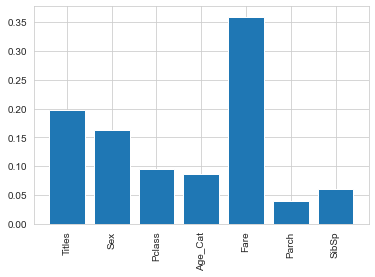

In [160]:
#plot the scores
pyplot.bar([x for x in cols],imp_scor)
plt.xticks(range(len(cols)),cols,rotation=90)
pyplot.show()

* The output shows that the important features are feature Titles, Sex and Fare.



### Filter Feature Selection: Coefficients Feature Importance

### Scale the data before doing coefficent feature importance

* What is scaing?
 - Scaing is the process of taking data that has different ranges, and processing it in such a way that all the data is in the same range.
* Why do we scale?
 - For machine learning purposes, we standardize so that the machine learning model can recognize each feature variable and its importance, and to give every feature a fair chance at predicting the target variable. 
 
* There are different types of scaling methods  :

1. Absolute maximum scaling 
 - Find absolute maximum of a feature.
 - Divide all values of the feature by the maximum value.
 - It usually and should give values between -1 and 1.
 - ** Disadvantages **
  - This method is sensitive to outliers.
  - If the data has an outlier,the scaling will not work.
  - Say most of the values of a certain feature have values less than 500, then an outlier has a maximum value of 90 000,
  - Dividing by this value will give values less than 0.005, which is not what the aim was.
2. MinMax Scaling
 - For each feature, the minimum value is subtracted from each value, then the difference is divided by the range of the feature.
 - The data should have alues ranging between 0 and 1.
 - **Disadvantages**
  - The method is sensitive to outliers.
3. Normalization
 - From each value in the feature, you subtract the mean. Then you divide by the range.
 - With normalizing you are changing the distribution of data, but with scaling you are changing the values.
4. Standardizing 
 - Each value in a feature variable is replaced by its z-value.
 - Can be used if the feature is normally distributed.
 - Values will be centered around the mean value with a standard deviation of 1.
5. Robust Scaling 
 - From each value in a feature variable the median of that feature is subtracted, then the difference is subtracted by inter-quartile range of the feature.
 - This method is not sensitive to outliers.
 
 Source : [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/05/feature-scaling-techniques-in-python-a-complete-guide/)



In [161]:
# Perform robust scaling on numerical variables only

rob_sca=RobustScaler()
# Scale only the coumns 4 onwards as that is where the numerical variables are at
X_train_sca=rob_sca.fit_transform(X_train[:,4:],y_train)


In [162]:
type(X_train_sca)

numpy.ndarray

In [163]:
X_train[:,0:4]

array([[0., 0., 2., 4.],
       [1., 1., 0., 5.],
       [2., 1., 2., 5.],
       ...,
       [2., 1., 2., 5.],
       [0., 0., 0., 5.],
       [0., 0., 2., 5.]])

In [164]:
# Combine the scaled numerical data with the categorical data
X_train_sca=np.c_[X_train_sca,X_train[:,0:4]]
X_train_sca.shape

(891, 7)

In [165]:
X_train_sca

array([[-0.3120106 ,  0.        ,  1.        , ...,  0.        ,
         2.        ,  4.        ],
       [ 2.46124229,  0.        ,  1.        , ...,  1.        ,
         0.        ,  5.        ],
       [-0.28277666,  0.        ,  0.        , ...,  1.        ,
         2.        ,  5.        ],
       ...,
       [ 0.38960398,  2.        ,  1.        , ...,  1.        ,
         2.        ,  5.        ],
       [ 0.67328148,  0.        ,  0.        , ...,  0.        ,
         0.        ,  5.        ],
       [-0.29035583,  0.        ,  0.        , ...,  0.        ,
         2.        ,  5.        ]])

In [166]:
# Logistic regression feature importance

#make model
model=LogisticRegression()



In [167]:
#fit model
random.seed(1)
model.fit(X_train_sca,y_train)

#Get the importance coefficients

coff=model.coef_

C:\Users\Student\Anaconda2\envs\Real_Useful_Python\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [168]:
for i in range(coff.shape[1]):
    print("Feature :%d,Name :%s, Score: %2f"%(i,cols[i],coff[:,i]))

Feature :0,Name :Titles, Score: 0.089648
Feature :1,Name :Sex, Score: -0.173780
Feature :2,Name :Pclass, Score: -0.398621
Feature :3,Name :Age_Cat, Score: 0.100469
Feature :4,Name :Fare, Score: 2.585216
Feature :5,Name :Parch, Score: -0.924618
Feature :6,Name :SibSp, Score: -0.377524


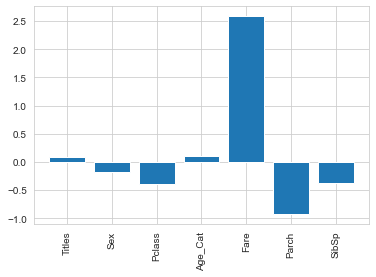

In [169]:
# Plot a bar plot of these coefficients

s=coff.reshape(-1,1)
s=s.reshape([7,])
s.shape


bars=cols
#y_pos=range(len(bars))

plt.bar([x for x in cols],s)
plt.xticks(range(len(cols)),rotation=90)
plt.show()

From the coefficients that we got, one can clearly see that we have negative and positive coefficinets. Since we are doing a binary classification problem with(1 for survived and 0 for perished),the positive coefficients are used to classify the class 1(survived) and the negative coefficients are used to classify the class 0. So when looking at the importance also look at the negative values and check which variable has high importance.

 *  The most important features are Fare,Parch, and Pclass.

In [170]:
s

array([ 0.08964819, -0.17378016, -0.39862105,  0.10046932,  2.58521561,
       -0.92461751, -0.37752406])

### Unsupervised FeatureSelection: Heatmap for Feature Correlation Analysis

* Heatmap Correlation Analysis is used to check which feature variables are correlated with the target variable. It will also help us check and see if collinearity exists between the feature variables.

In [171]:
df=pd.DataFrame(X_train,columns=cols)

In [172]:
df

,Titles,Sex,Pclass,Age_Cat,Fare,Parch,SibSp
0,0.0,0.0,2.0,4.0,7.2500,0.0,1.0
1,1.0,1.0,0.0,5.0,71.2833,0.0,1.0
2,2.0,1.0,2.0,5.0,7.9250,0.0,0.0
3,1.0,1.0,0.0,5.0,53.1000,0.0,1.0
4,0.0,0.0,2.0,5.0,8.0500,0.0,0.0
...,...,...,...,...,...,...,...
886,5.0,0.0,1.0,5.0,13.0000,0.0,0.0
887,2.0,1.0,0.0,4.0,30.0000,0.0,0.0
888,2.0,1.0,2.0,5.0,23.4500,2.0,1.0
889,0.0,0.0,0.0,5.0,30.0000,0.0,0.0


In [173]:
target=pd.DataFrame(y_train,columns=["Target"])
df["Target"]=target["Target"]

In [174]:
df

,Titles,Sex,Pclass,Age_Cat,Fare,Parch,SibSp,Target
0,0.0,0.0,2.0,4.0,7.2500,0.0,1.0,0
1,1.0,1.0,0.0,5.0,71.2833,0.0,1.0,1
2,2.0,1.0,2.0,5.0,7.9250,0.0,0.0,1
3,1.0,1.0,0.0,5.0,53.1000,0.0,1.0,1
4,0.0,0.0,2.0,5.0,8.0500,0.0,0.0,0
...,...,...,...,...,...,...,...,...
886,5.0,0.0,1.0,5.0,13.0000,0.0,0.0,0
887,2.0,1.0,0.0,4.0,30.0000,0.0,0.0,1
888,2.0,1.0,2.0,5.0,23.4500,2.0,1.0,0
889,0.0,0.0,0.0,5.0,30.0000,0.0,0.0,1


In [175]:
import seaborn as sns

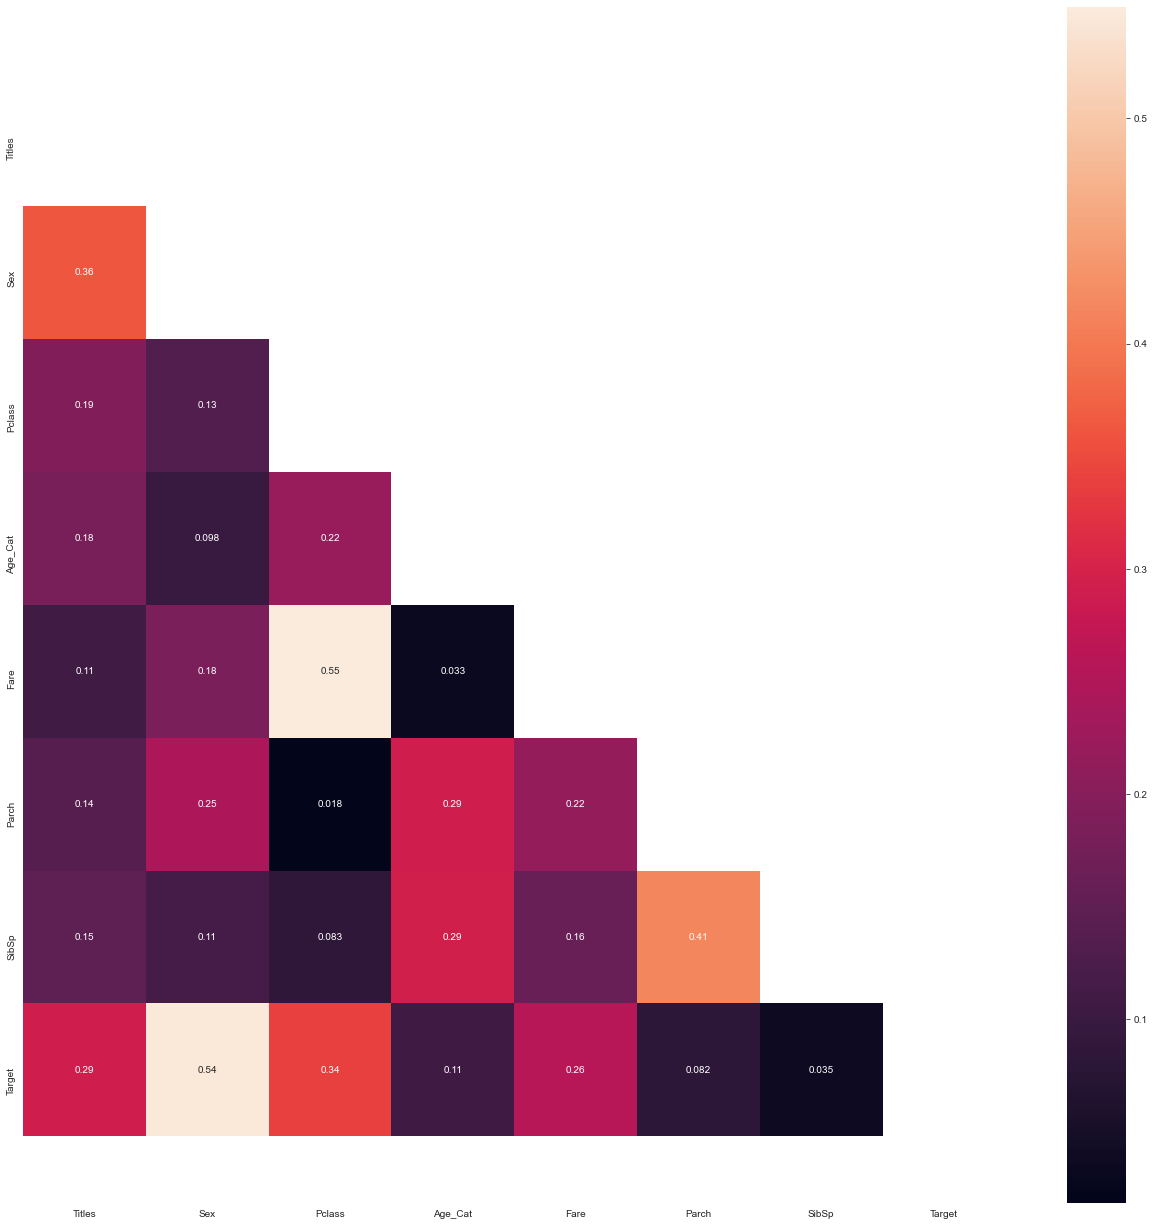

In [176]:
plt.figure(figsize=(22,22))
corre=df.corr()
mask=np.tri(*corre.shape).T
sns.heatmap(corre.abs(),mask=mask,annot=True)
b,t=plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.show()

* The heatmap/correlation matrix shows that all the feature variables have a positive relatiosnhip with the target feature as there are no negative values(The relationship with taregt variable can be seen at the last row)
* For this method we will look for variables with correlation values that have a correlation that is above 0.1.
* They are Titles,Sex,Pclass,and Fare.

### Let us look at the features that are most common in at least 2 methods we have used.




1. **RFE** - All features,Titles, Sex, Pclass, Age_Cat, Fare, Parch, SibSp.
2. **Feature Importance as Decision Tree** -Features Titles, Sex and Fare.
3. **Coefficients Feature Importance** - Features Fare,Parch, and Pclass.
4. **Heatmap for Feature Correlation Analysis** - Features Titles,Sex,Pclass,and Fare.

**Conclusion** - The most important features are `Titles[0]`,`Sex[1]`,`Pclass[2]`,`Fare[4]`,and `Parch[5]`.

In [177]:
# Extract the features to use for prediction
X_train=X_train[:,[0,1,2,4,5]]

# Update column names in a list

cols=["Titles","Sex","Pclass","Fare","Parch"]


In [178]:
X_train.shape

(891, 5)

In [179]:
X_train

array([[ 0.    ,  0.    ,  2.    ,  7.25  ,  0.    ],
       [ 1.    ,  1.    ,  0.    , 71.2833,  0.    ],
       [ 2.    ,  1.    ,  2.    ,  7.925 ,  0.    ],
       ...,
       [ 2.    ,  1.    ,  2.    , 23.45  ,  2.    ],
       [ 0.    ,  0.    ,  0.    , 30.    ,  0.    ],
       [ 0.    ,  0.    ,  2.    ,  7.75  ,  0.    ]])

In [180]:
# Do the same for test
X_test=X_test[:,[0,1,2,4,5]]

In [181]:
X_test.shape

(418, 5)

In [182]:
X_test

array([[ 0.    ,  0.    ,  2.    ,  7.8292,  0.    ],
       [ 1.    ,  1.    ,  2.    ,  7.    ,  0.    ],
       [ 0.    ,  0.    ,  1.    ,  9.6875,  0.    ],
       ...,
       [ 0.    ,  0.    ,  2.    ,  7.25  ,  0.    ],
       [ 0.    ,  0.    ,  2.    ,  8.05  ,  0.    ],
       [ 3.    ,  0.    ,  2.    , 22.3583,  1.    ]])

## Modelling Stage
---

### **Model to be used** :
 1. Logistc Regression



### Check for outliers in the data

* Before we model the data it is very important to check whether the data has any outliers.
* Outliers are data points that deviate from the other data points.
* As a result they have to be removed as they will be misleading to the model.
* They have an impact on mean and standard deviation calculations, and they skew hypothesis tests.
* The data we have here is not very large,as a result we will have to find ways of dealing with the outliers that does not involve dropping or deleting rows.
* Note that the data also has  categorical variables turned dummy variables. 
* Categorical data generally has no outliers/the concept of outliers generally does not apply to categorical viaribales, as there is no value, just categories that have specific frequencies.
* For exampe with the Sex category, we had males and females. Say there were 20 males and 400 females. We cannot say males are outliers as they are few. The number of males is the frequency of females, which does not indicate an outlier.
* But if we had 20 males and 400 females then one data points' Sex is "Dog", then we would consider that an outlier.
* It would be considered an outlier as it is very different from the other Sex values we have, and it is the only one we have.
* But generally,categorical data does not have outliers.
* An outlier is a value in numerical variables that is smaller or bigger than the other majority values. It differs from the other values.
* And so we will have to deal only with the variables that are numerical for outlier detection.


In [183]:
#Use the describe function to check for outliers
df.describe()[["Fare","Parch","SibSp"]]

,Fare,Parch,SibSp
count,891.000000,891.000000,891.000000
mean,32.204208,0.381594,0.523008
std,49.693429,0.806057,1.102743
min,0.000000,0.000000,0.000000
25%,7.910400,0.000000,0.000000
50%,14.454200,0.000000,0.000000
75%,31.000000,0.000000,1.000000
max,512.329200,6.000000,8.000000


#### **Check for univariate outliers**

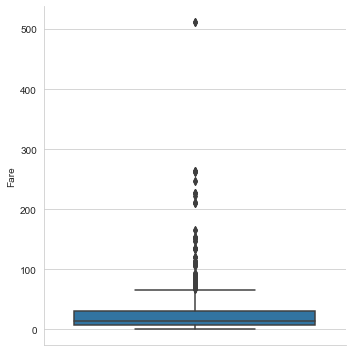

In [184]:
sns.catplot(y="Fare",kind="box",data=df)

* Fare has outliers

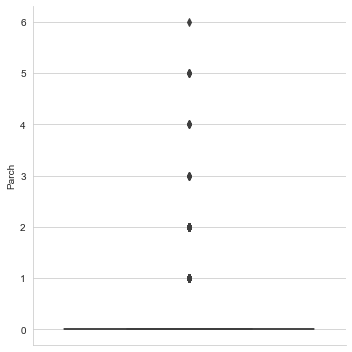

In [185]:
sns.catplot(y="Parch",kind="box",data=df)

* Parch also has outliers

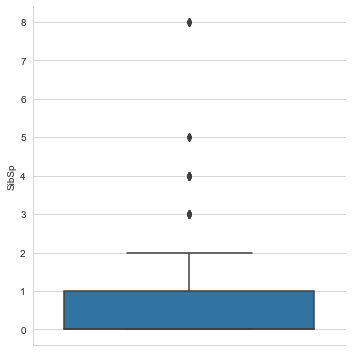

In [186]:
sns.catplot(y="SibSp",kind="box",data=df)

* SibSp also has outliers.

#### **Check for mutlivariate outliers(outliers in twi or more variables).**

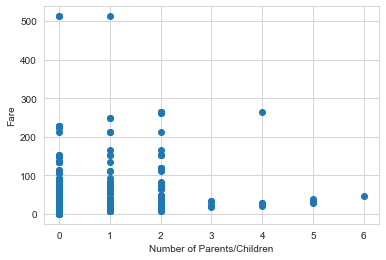

In [187]:
plt.scatter(x=df["Parch"],y=df["Fare"])
plt.xlabel("Number of Parents/Children")
plt.ylabel("Fare")
plt.show()

* There are multivariate outliers for Fare and Parch.

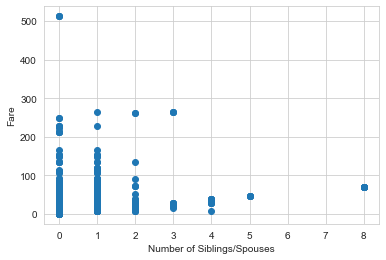

In [188]:
plt.scatter(x=df["SibSp"],y=df["Fare"])
plt.xlabel("Number of Siblings/Spouses")
plt.ylabel("Fare")
plt.show()

* There are very few outliers for SibSp and Fare.

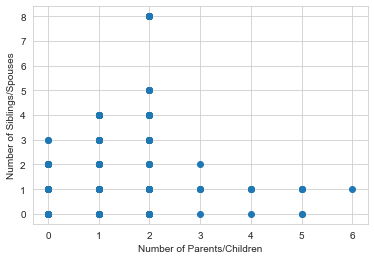

In [189]:
plt.scatter(x=df["Parch"],y=df["SibSp"])
plt.xlabel("Number of Parents/Children")
plt.ylabel("Number of Siblings/Spouses")
plt.show()

* There is only one outlier for Parch and SibSp.

#### Check outlier detection using histogram
* The histogram helps us see if the data is normally distributed.
* If it is normally distributed, we can use the Z-score to find outliers, but if it is not we will have to uise other means of detecting outliers.

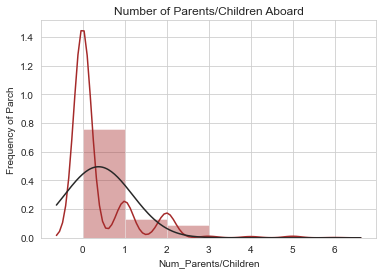

In [190]:
sns.distplot(df.Parch,color='brown',rug=False,fit=norm,bins=6)
plt.title("Number of Parents/Children Aboard")
plt.xlabel("Num_Parents/Children")
plt.ylabel("Frequency of Parch")
plt.show()

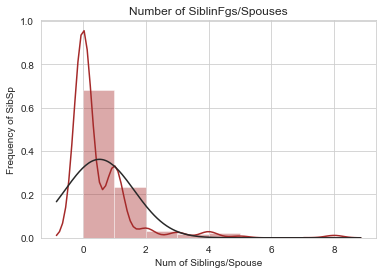

In [191]:
sns.distplot(df.SibSp,color='brown',rug=False,fit=norm,bins=8) 
plt.title("Number of SiblinFgs/Spouses")
plt.xlabel("Num of Siblings/Spouse")
plt.ylabel("Frequency of SibSp")
plt.show()

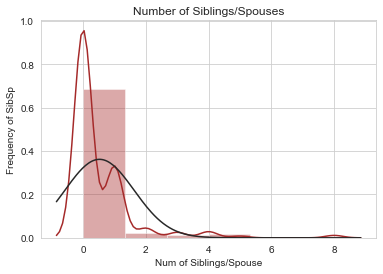

In [192]:
sns.distplot(df.SibSp,color='brown',rug=False,fit=norm,bins=6) 
plt.title("Number of Siblings/Spouses")
plt.xlabel("Num of Siblings/Spouse")
plt.ylabel("Frequency of SibSp")
plt.show()

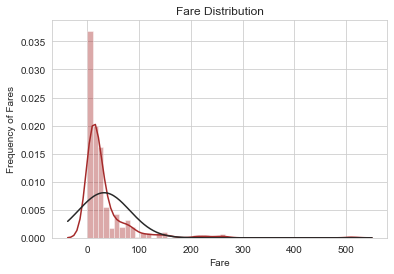

In [193]:
sns.distplot(df.Fare,color='brown',rug=False,fit=norm)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency of Fares")
plt.show()

* All the features are not normally distributed.

### Identifying outliers

* Sinnce the data is not normally distributed, we will use a statistcal method called interquartile range(IQR).
* Interquartile range is defined as Q3-Q1, where Q1 is the 25th percentaile and Q3 is the 75th percentile of the data.
* In IQR, outliers are values lying below Q1-1.5IQR or above Q3+1.5IQR.

In [194]:
def get_outliers(d):
    Q1=d.quantile(0.25)
    Q3=d.quantile(0.75)
    IQR=Q3-Q1
    outliers=d[((d<(Q1-1.5*IQR))|(d>(Q3+1.5*IQR)))]
    return outliers

In [195]:
# Checking for outliers in Fare column
outl=get_outliers(df["Fare"])
print("Number of Outliers :",len(outl))
outl

Number of Outliers : 116


1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

In [196]:
# Check for outliers
outl=get_outliers(df["SibSp"])
print("Number of outliers :",len(outl))
outl

Number of outliers : 46


7      3.0
16     4.0
24     3.0
27     3.0
50     4.0
59     5.0
63     3.0
68     4.0
71     5.0
85     3.0
88     3.0
119    4.0
159    8.0
164    4.0
171    4.0
176    3.0
180    8.0
182    4.0
201    8.0
229    3.0
233    4.0
261    4.0
266    4.0
278    4.0
324    8.0
341    3.0
374    3.0
386    5.0
409    3.0
480    5.0
485    3.0
541    4.0
542    4.0
634    3.0
642    3.0
683    5.0
686    4.0
726    3.0
787    4.0
792    8.0
813    4.0
819    3.0
824    4.0
846    8.0
850    4.0
863    8.0
Name: SibSp, dtype: float64

In [197]:
# Check for outliers on Parch column
outl=get_outliers(df["Parch"])
print("Number of outliers :",len(outl))
outl

Number of outliers : 213


7      1.0
8      2.0
10     1.0
13     5.0
16     1.0
      ... 
871    1.0
879    1.0
880    1.0
885    5.0
888    2.0
Name: Parch, Length: 213, dtype: float64

In [198]:
# Run the all the columns through the function to get a sense of where in the dataframe the outliers are.
#If a value is an outlier it will appear as a number, but if it is not it will appear as NaN

outlies=get_outliers(df[["Fare","SibSp","Parch"]])
outlies

,Fare,SibSp,Parch
0,NaN,NaN,NaN
1,71.2833,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
886,NaN,NaN,NaN
887,NaN,NaN,NaN
888,NaN,NaN,2.0
889,NaN,NaN,NaN


### Handling outliers

* For our data, the outlier values will be imputed using the mean as the data is very small.

In [199]:
def outlie_impute(d):
    Q1=d.quantile(0.25)
    Q3=d.quantile(0.75)
    IQR=Q3-Q1
    upper=d[~(d>(Q3+1.5*IQR))].max()  # This here says that the upper limit is the maximum value of the values that are not(~) greater than Q3+1.5IQR.i.e it is the maximum value of the values that are not outliers.
    lower=d[~(d<(Q1-1.5*IQR))].min() # Here we say the lower limit is the minimum value of the values that are not(~) outliers/below Q1-1.5IQR .
    d=np.where(d>upper,d.mean(),np.where(d<lower,d.mean(),d))  # Here we are replacing the values that are greater than the upper bound,i.e the values that are greater than Q3+1.5IQR(outliers) with the mean. We are also replacing the values taht are lower than Q1-1.5IQR(outliers)  
    return d

In [200]:
# Impute the outliers
df["Fare"]=outlie_impute(df["Fare"])
df["SibSp"]=outlie_impute(df["SibSp"])
df["Parch"]=outlie_impute(df["Parch"])
df.describe()

,Titles,Sex,Pclass,Age_Cat,Fare,Parch,SibSp,Target
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.936027,0.352413,1.308642,4.520763,19.694510,0.091223,0.324420,0.383838
std,1.725341,0.477990,0.836071,1.312158,13.556718,0.162844,0.519081,0.486592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,4.000000,7.910400,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,5.000000,14.454200,0.000000,0.000000,0.000000
75%,2.000000,1.000000,2.000000,5.000000,31.000000,0.000000,1.000000,1.000000
max,16.000000,1.000000,2.000000,6.000000,65.000000,0.381594,2.000000,1.000000


* As we can see the statistics of the column with imputed values has changed.
* Let us visualise the column again to see how they look.

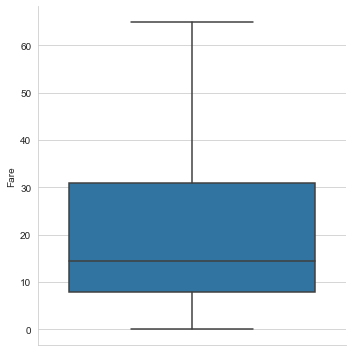

In [201]:
sns.catplot(y="Fare",kind="box",data=df)
plt.show()

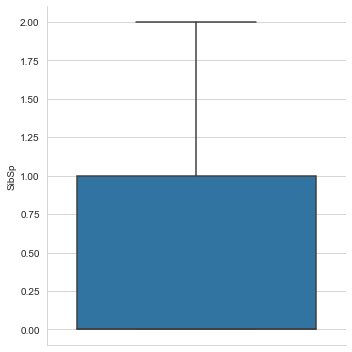

In [202]:
sns.catplot(y="SibSp",kind="box",data=df)
plt.show()

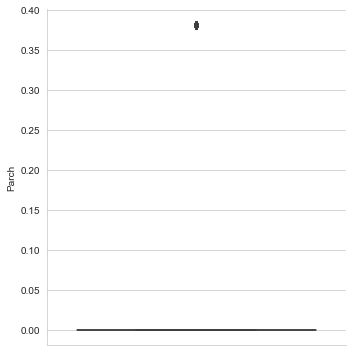

In [203]:
sns.catplot(y="Parch",kind="box",data=df)
plt.show()

### Logistic Regression

 * It is a machine learning model used only for binary classification.
 * It uses a logistic function: logistic = $ \frac{1}{1+e^(-(z))}$
 * It takes real-valued inputs and computes the probabilty of belonging to each class for those inputs.
 * If we have a default class 0(in our case perishsed class) and another class 1(survived class), it will output a probability.
 * If the probability is >0.5, then the classification is that the data point belongs to the default class(0), but if it is <=0.5  then we classify it as the other class(1).
 
 * **Advantages**
  1. It is easy to build and train.
  2. It does not require high computational power.
  3. It is easy to interpret.
 
 * **Disadvantages**
  1. It cannot handle large number of categorical features.
  2. It has a tendency to overfit.
  3. It is badly affected by outliers.
  4. It assumes a normal distribution for the feature variables.
  



In [204]:
#Create the model
log_model=LogisticRegression()


In [205]:
#Fit the model
random.seed(1)
log_model.fit(X_train,y_train)

C:\Users\Student\Anaconda2\envs\Real_Useful_Python\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [206]:
# Get accuracy matrix
print(classification_report(y_train,log_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       549
           1       0.74      0.70      0.72       342

    accuracy                           0.79       891
   macro avg       0.78      0.77      0.78       891
weighted avg       0.79      0.79      0.79       891



* The accuracy of the model is 79
* Let us get some predictions on the test data. The test data has no labels, and so cannot be used for accuracy measurement.
* We will just get the predictions.

In [207]:
test_predictions=log_model.predict_proba(X_test)
print("Probabilty predictions -","0 : %3f"%test_predictions[0][0]," 1 :%3f"%test_predictions[0][1])

Probabilty predictions - 0 : 0.897785  1 :0.102215


* From the above we can see that the 0 class has the highest probabilty and is therefore the class predicted.

### Model Accuracy Improvement

* The Logistic Regression has the following data pre-processing requirements :
    1. Remove outliers(Which we already did)
    2. Remove mutlicollinearity - The model asssumees that the feature variables are not correlated with each other. Highly correlated features should be removed.
    3. Assert linear assumption - Feature variables need to have a linear relationship with the target variable. A log transformation is used to assert that relationship if it is not present.
    4. Assert normal distribution - Feature variables need to hae a normal distribution. If they are not normally distributed a log transform or BoxCox is used to assert the distribution.
    5. Feature scaling - The features must be scaled as they might not be habing the same range of values, therefore redulting in features with high numbers dominating the model and appearing to be more important than other variables. Feature scaling helps us scale them to the same range and tehrefore give each feature a chance to equally contribute to the model.
* To improve the model accuracy we will fulfill these requirements for the model before training.
    

### Remove Multicollinearity
* A heatmap will be used to check for multicolliearity.
* Multicollinearity is very common to occur in data, but all that matters is how extreme is it.
* If two feature variables have a correlation value greater than 0.8, then those two should be removed.
* Or else the features should be kept.

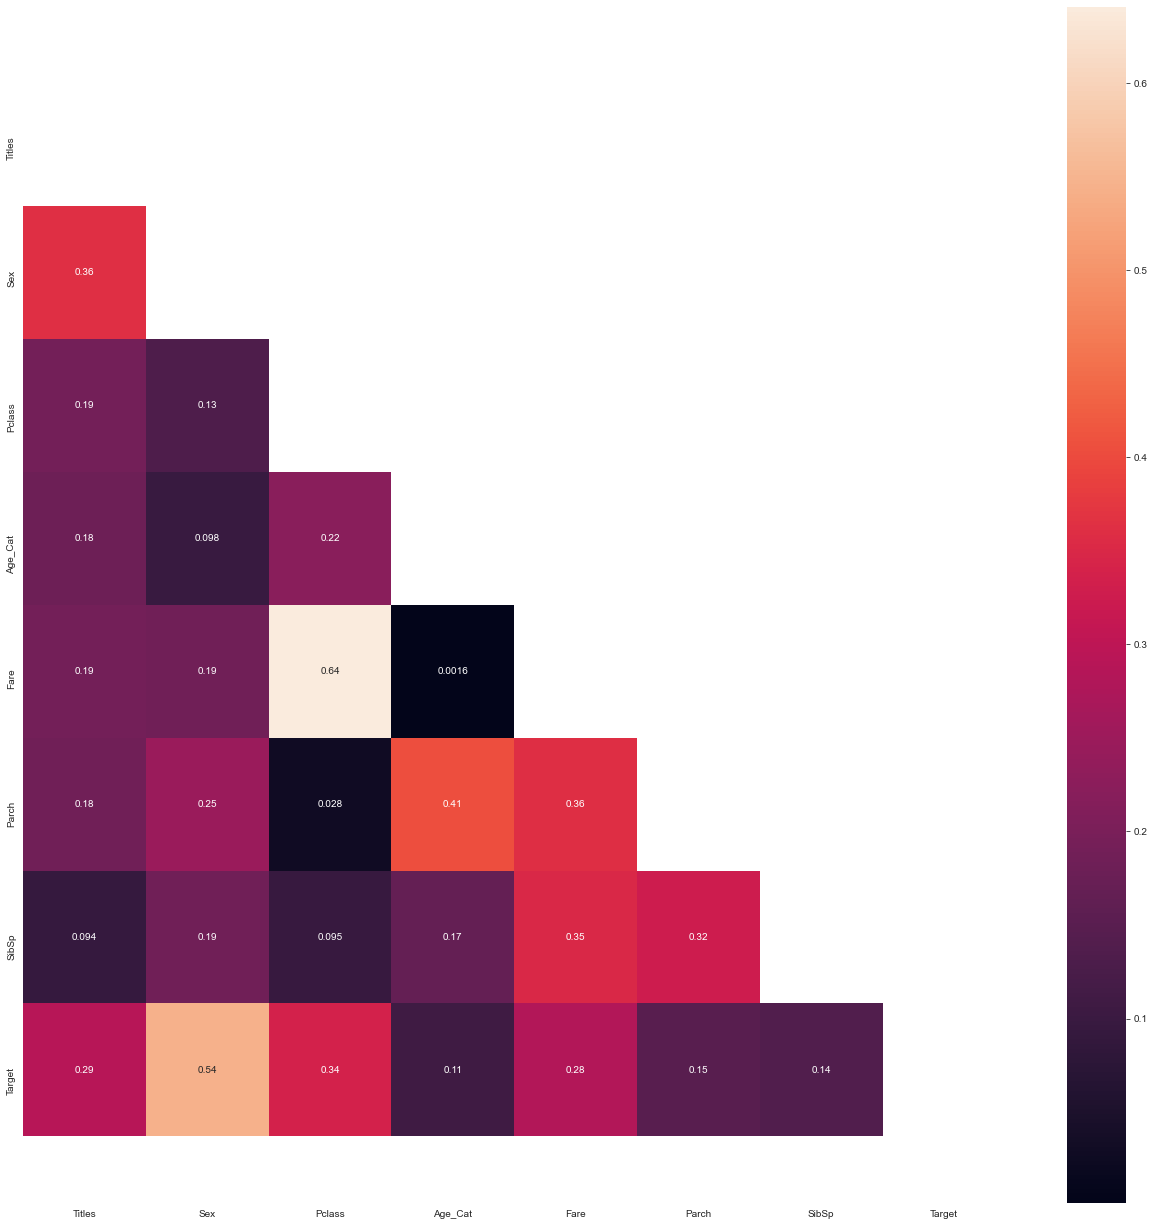

In [208]:
# Plot a heatmap

plt.figure(figsize=(22,22))
corre=df.corr()
mask=np.tri(*corre.shape).T
sns.heatmap(corre.abs(),mask=mask,annot=True)
b,t=plt.ylim()
b+=0.5
t-=0.5
plt.ylim(b,t)
plt.show()

* From this heatmap, there are no two feature variables with correlation values greater than 0.8.and so all will be kept.

### Assert Linear Assumption

In [209]:
# Get the correlations between the features and the target variable.
yourdata = df
corr_matrix = yourdata.corr()
print(corr_matrix["Target"].sort_values(ascending=False))

Target     1.000000
Sex        0.543351
Titles     0.290260
Fare       0.283273
Parch      0.147408
SibSp      0.136609
Age_Cat   -0.107524
Pclass    -0.338481
Name: Target, dtype: float64


* Some of the values have a negative relationship, some have a positive relationship with the target variable.
* All the correlatin values are less than 0.8 and greater than -0.8 which means they are not significant.
* So we will have to do log transform to increase the correlation and therefore fulfill the linear relationship assertion of logistic regression.
* From previous plots we saw that the data is not normally distributed. The log transfrm will also help with that.
* The categorical features will not be transformed as transforming them will change their meaning.
* Source  to read [Towards Data Science](https://towardsdatascience.com/what-it-takes-to-be-correlated-ce41ad0d8d7f)

In [210]:
df

,Titles,Sex,Pclass,Age_Cat,Fare,Parch,SibSp,Target
0,0.0,0.0,2.0,4.0,7.250000,0.000000,1.0,0
1,1.0,1.0,0.0,5.0,32.204208,0.000000,1.0,1
2,2.0,1.0,2.0,5.0,7.925000,0.000000,0.0,1
3,1.0,1.0,0.0,5.0,53.100000,0.000000,1.0,1
4,0.0,0.0,2.0,5.0,8.050000,0.000000,0.0,0
...,...,...,...,...,...,...,...,...
886,5.0,0.0,1.0,5.0,13.000000,0.000000,0.0,0
887,2.0,1.0,0.0,4.0,30.000000,0.000000,0.0,1
888,2.0,1.0,2.0,5.0,23.450000,0.381594,1.0,0
889,0.0,0.0,0.0,5.0,30.000000,0.000000,0.0,1


In [211]:
log=['Fare','SibSp','Parch']
trans=df[log].applymap(lambda x: np.log(x+1))


In [212]:
trans

,Fare,SibSp,Parch
0,2.110213,0.693147,0.000000
1,3.502677,0.693147,0.000000
2,2.188856,0.000000,0.000000
3,3.990834,0.693147,0.000000
4,2.202765,0.000000,0.000000
...,...,...,...
886,2.639057,0.000000,0.000000
887,3.433987,0.000000,0.000000
888,3.196630,0.693147,0.323238
889,3.433987,0.000000,0.000000


In [213]:
df['Fare']=trans['Fare']
df['SibSp']=trans['SibSp']
df['Parch']=trans['Parch']
df

,Titles,Sex,Pclass,Age_Cat,Fare,Parch,SibSp,Target
0,0.0,0.0,2.0,4.0,2.110213,0.000000,0.693147,0
1,1.0,1.0,0.0,5.0,3.502677,0.000000,0.693147,1
2,2.0,1.0,2.0,5.0,2.188856,0.000000,0.000000,1
3,1.0,1.0,0.0,5.0,3.990834,0.000000,0.693147,1
4,0.0,0.0,2.0,5.0,2.202765,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...
886,5.0,0.0,1.0,5.0,2.639057,0.000000,0.000000,0
887,2.0,1.0,0.0,4.0,3.433987,0.000000,0.000000,1
888,2.0,1.0,2.0,5.0,3.196630,0.323238,0.693147,0
889,0.0,0.0,0.0,5.0,3.433987,0.000000,0.000000,1


In [214]:
# Recompute the correlation values
yourdata = df
corr_matrix = yourdata.corr()
print(corr_matrix["Target"].sort_values(ascending=False))

Target     1.000000
Sex        0.543351
Fare       0.297209
Titles     0.290260
Parch      0.147408
SibSp      0.138120
Age_Cat   -0.107524
Pclass    -0.338481
Name: Target, dtype: float64


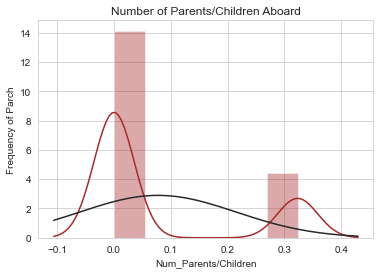

In [215]:
# Check for normal distribution
sns.distplot(df.Parch,color='brown',rug=False,fit=norm,bins=6)
plt.title("Number of Parents/Children Aboard")
plt.xlabel("Num_Parents/Children")
plt.ylabel("Frequency of Parch")
plt.show()


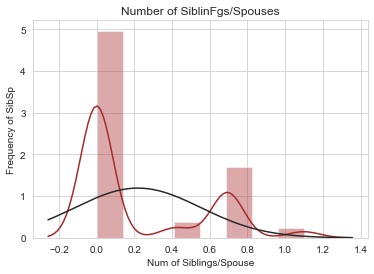

In [216]:
sns.distplot(df.SibSp,color='brown',rug=False,fit=norm,bins=8) 
plt.title("Number of SiblinFgs/Spouses")
plt.xlabel("Num of Siblings/Spouse")
plt.ylabel("Frequency of SibSp")
plt.show()

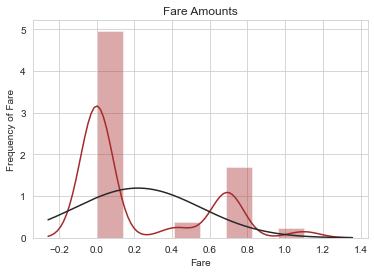

In [217]:
sns.distplot(df.SibSp,color='brown',rug=False,fit=norm,bins=8) 
plt.title("Fare Amounts")
plt.xlabel("Fare")
plt.ylabel("Frequency of Fare")
plt.show()

* The data is not normally distributed, but it got closer to the normal distribution after log transform.
* Now let us scale the data using robust scaler. We will only scale the numerical features.

In [218]:
df

,Titles,Sex,Pclass,Age_Cat,Fare,Parch,SibSp,Target
0,0.0,0.0,2.0,4.0,2.110213,0.000000,0.693147,0
1,1.0,1.0,0.0,5.0,3.502677,0.000000,0.693147,1
2,2.0,1.0,2.0,5.0,2.188856,0.000000,0.000000,1
3,1.0,1.0,0.0,5.0,3.990834,0.000000,0.693147,1
4,0.0,0.0,2.0,5.0,2.202765,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...
886,5.0,0.0,1.0,5.0,2.639057,0.000000,0.000000,0
887,2.0,1.0,0.0,4.0,3.433987,0.000000,0.000000,1
888,2.0,1.0,2.0,5.0,3.196630,0.323238,0.693147,0
889,0.0,0.0,0.0,5.0,3.433987,0.000000,0.000000,1


In [219]:
# Make the transformed df a matrix

X_train=df.values

rob_sca=RobustScaler()
# Scale only the coumns 4 to 6 as that is where the numerical variables are at
X_train_sca=rob_sca.fit_transform(X_train[:,4:6],y_train)


In [220]:
X_train

array([[0.        , 0.        , 2.        , ..., 0.        , 0.69314718,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.        , 0.69314718,
        1.        ],
       [2.        , 1.        , 2.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [2.        , 1.        , 2.        , ..., 0.3232377 , 0.69314718,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 2.        , ..., 0.        , 0.        ,
        0.        ]])

In [221]:
# Refit the model
logi_model=LogisticRegression()

In [222]:
#Fit the model
random.seed(16)
logi_model.fit(X_train,y_train)

C:\Users\Student\Anaconda2\envs\Real_Useful_Python\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [223]:
# Get accuracy matrix
print(classification_report(y_train,logi_model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



* The model got 100% accuarcy after the pre-processing.
* But this is nothing to celebrate, as the accuracy is an indication of overfitting.
* Overrfitting occurs when the model perfectly fits the train data with little to no generalizing.
* This means that the model would perform bad on data it has never seen before, as it not generalizing well, but is only specific to the train data it was given.
* So we will have to add regularization to the model

In [224]:
random.seed(24)
reg_logmodel=LogisticRegression(penalty="l2",solver="liblinear")
reg_logmodel.fit(X_train,y_train)

C:\Users\Student\Anaconda2\envs\Real_Useful_Python\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [225]:
print(classification_report(y_train,reg_logmodel.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



In [226]:
random.seed(9)
reg_logmodel2=LogisticRegression(penalty="l1",solver="liblinear")
reg_logmodel2.fit(X_train,y_train)

C:\Users\Student\Anaconda2\envs\Real_Useful_Python\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [227]:
print(classification_report(y_train,reg_logmodel2.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



In [228]:
random.seed(14)
reg_logmodel3=LogisticRegression(penalty="elasticnet",solver="saga",l1_ratio=0.2)
reg_logmodel3.fit(X_train,y_train)

C:\Users\Student\Anaconda2\envs\Real_Useful_Python\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Student\Anaconda2\envs\Real_Useful_Python\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.2, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [229]:
print(classification_report(y_train,reg_logmodel3.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



## Discussion
---
* The above results show that after doing the proper pre-processing,the logistic regression gave an accuracy of 100%.
* There are no labels for the test data, and therefore, no way to use the data and check if the model performs well on unseen data, so we will have to settle for the accuracies of the train data.
* Therefore, there is no way of telling whether the model ovefitted or not.
